<a href="https://colab.research.google.com/github/freentour/AIFFEL_quest/blob/main/Main_quest/Datathon/datathon_by_Team_CDT(LHN%2CYJM%2CKJH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 0. 설계
- 먼저, 가장 기본적인 데이터만 가지고 기준이 될 베이스 모델을 정의해 훈련 진행
- 데이터의 왜도(skewness) 현상만 줄인 상태에서 베이스 모델과 동일한 조건으로 훈련 진행
- 도시별로 데이터를 나누어서 훈련 진행
- 실거래가 기준으로 너무 적은 금액과 너무 높은 금액 제거 후 훈련 진행

# STEP 1. 데이터 살펴보기

## 1.1 라이브러리 가져오기

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import tensorflow as tf
from tensorflow import keras

## 1.2 데이터셋 불러오기

### 1.2.1 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2.2 데이터셋 불러오기

In [ ]:
# 구글 드라이브 기준 csv 파일 경로
# /content/drive/MyDrive/AIFFEL/train.csv

In [ ]:
# 로컬 컴퓨터 기준
# csv_path_dcc = "data/day_care_center.csv"
# csv_path_park = "data/park.csv"
# csv_path_train = "data/train.csv"
# csv_path_test = "data/test.csv"

# LMS 기준
# csv_path_dcc = "apartment/day_care_center.csv"
# csv_path_park = "apartment/park.csv"
# csv_path_train = "apartment/train.csv"
# csv_path_test = "apartment/test.csv"

# 구글 드라이브 기준
csv_path_dcc = "/content/drive/MyDrive/AIFFEL/day_care_center.csv"
csv_path_park = "/content/drive/MyDrive/AIFFEL/park.csv"
csv_path_train = "/content/drive/MyDrive/AIFFEL/train.csv"
csv_path_test = "/content/drive/MyDrive/AIFFEL/test.csv"

origin_dcc_df = pd.read_csv(csv_path_dcc)
origin_park_df = pd.read_csv(csv_path_park)
origin_train_df = pd.read_csv(csv_path_train)
origin_test_df = pd.read_csv(csv_path_test)

## 1.3 원본 데이터 복사하기

In [ ]:
dcc_df = origin_dcc_df.copy()
park_df = origin_park_df.copy()
train_df = origin_train_df.copy()
test_df = origin_test_df.copy()

## 1.4 데이터셋 살펴보기

### 1.4.1 train 데이터셋 기본 정보 확인

In [ ]:
train_df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700


In [ ]:
# 기본 정보 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:
# 기본 통계 정보 확인
train_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [ ]:
# 컬럼별 기본 정보(개수) 확인
for col in train_df.columns:
    print(f"{col}: {train_df[col].value_counts()}")
    print('='*20)

transaction_id: transaction_id
0          1
811041     1
811039     1
811038     1
811037     1
          ..
405518     1
405517     1
405516     1
405515     1
1234827    1
Name: count, Length: 1216553, dtype: int64
apartment_id: apartment_id
8415     3220
10939    3094
4449     2886
8031     2572
2120     2536
         ... 
1052        1
9992        1
7665        1
9200        1
9543        1
Name: count, Length: 12533, dtype: int64
city: city
서울특별시    742285
부산광역시    474268
Name: count, dtype: int64
dong: dong
상계동    29346
좌동     23255
화명동    21511
용호동    17398
중계동    17079
       ...  
주성동        2
누상동        2
옥인동        1
구수동        1
효제동        1
Name: count, Length: 473, dtype: int64
jibun: jibun
176-30    6594
17        3709
944       3615
53        3566
479       3435
          ... 
793-36       1
797-43       1
718-10       1
792-10       1
94-8         1
Name: count, Length: 8961, dtype: int64
apt: apt
현대         13154
한신          9766
삼성          6729
대우          6216
신동아 

### 1.4.2 컬럼별 기본 정보 정리
- 총 데이터 : 1,216,553건
- transaction_id : 총 1,216,553개 (중복 없음)
- apartment_id : 총 12,533개 아파트
  - 0번부터 시작함.
  - 최대 거래 아파트 : apartment_id가 8415번인 아파트에서만 무려 3,220건의 실제 거래가 있었음. (호가 아니라 아파트 기준임)
- city : 서울특별시, 부산광역시 2 종류만 있음.
  - 서울특별시 : 742,285건
  - 부산광역시 : 474,268건
- dong : 총 473개 동(행정구역).
  - 최대 거래 동 : 상계동(29,346건)
- jibun : 총 8,961개 지번.
  - 최대 거래 지번 : 176-30(6,594건)
- apt : 총 10,440개 아파트
  - 최대 거래 아파트 : 현대(13,154건)
- addr_kr : 총 12,533개 주소
  - 최대 거래 주소 : 용호동 944 오륙도에스케이뷰(3,220건). 이 아파트의 apartment_id가 8415번인 것으로 생각됨.
- exclusive_use_area : 총 16,856개 사이즈.
  - 평균 : 78.16 제곱미터(23.64평)
  - 표준편차 : 29.15
  - min : 9.26 제곱미터(2.8평)
  - 25% : 59.76 제곱미터(18평)
  - 50%(중앙값) : 82.41 제곱미터(24.9평)
  - 75% : 84.97 제곱미터(25.7평)
  - max : 424.32 제곱미터(128평)
  - 최대 거래 크기 : 84.99 제곱미터. 25.7평. (22,549건)
- year_of_completion : 완공년도
  - 평균 : 1998.297
  - 표준편차 : 8.94
  - min : 1961
  - 25% : 1993
  - 50%(중앙값) : 1999
  - 75% : 2005
  - max : 2017
  - 최대 거래 년도 : 2004년 완공 아파트(71,809건)
- transaction_year_month : 총 119개 월.
  - 평균 : 201298.4
  - 표준편차 : 290.5732
  - min : 200801
  - 25% : 201001
  - 50%(중앙값) : 201312
  - 75% : 201511
  - max : 201711
  - 최대 거래 년도/월 : 2015년 3월(22,444건)
- transaction_date : 총 6개 구간. (1~10/11~20/21~28/21~29/21~30/21~31)
  - 최대 거래 구간 : 1~10(391,715건)
- floor : 총 84개 층.
  - 평균 : 9.34
  - 표준편차 : 6.6
  - min : -4층
  - 25% : 4층
  - 50%(중앙값) : 8층
  - 75% : 13층
  - max : 80층
  - 최대 거래 층 : 5층(88,676건)
  - **[체크] 음수 값을 가진 층이 있음. 정상적인 층인지 아닌지 체크 필요!**
- transaction_real_price : 총 21,200개 가격.
  - 평균 : 38227.6 만원
  - 표준편차 : 31048.98
  - min : 100 만원
  - 25% : 1억 9천만원
  - 50%(중앙값) : 3억 9백만원
  - 75% : 4억 7천만원
  - max : 82억
  - 최대 거래 가격 : 30,000(만원) - 10,790건

### 1.4.3 특이한 데이터 확인하기

#### 1.4.3.1 동(dong) 기준

In [ ]:
# dong 컬럼에 unique() 적용 후, 정렬해서 확인
pd.Series(train_df['dong'].sort_values().unique())
# 다음과 같이 해도 됨.
# pd.Series(np.sort(train_df['dong'].unique()))

0       가락동
1      가리봉동
2       가산동
3       가야동
4       가양동
       ... 
468     효창동
469     후암동
470     휘경동
471     흑석동
472     흥인동
Length: 473, dtype: object

#### 1.4.3.2 apartment_id 기준

In [ ]:
# apartment_id 컬럼 정렬해서 확인 --> apartment_id : 0번이 있다고?
pd.Series(train_df['apartment_id'].sort_values().unique())

0            0
1            1
2            2
3            3
4            4
         ...  
12528    12654
12529    12655
12530    12656
12531    12657
12532    12658
Length: 12533, dtype: int64

In [ ]:
# apartment_id : 0번인 아파트 거래 내역 확인 ==> 정상 데이터!
train_df[train_df['apartment_id'] == 0]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
36850,36850,0,서울특별시,행당동,1-10,(1-10),행당동 1-10 (1-10),75.7,2003,201411,1~10,4,15000


#### 1.4.3.3 아파트 이름(apt) 기준

In [ ]:
# apt 컬럼에 아파트 이름이 아니라 지번 등으로 입력된 것들이 있음. ==> 일단 정상 데이터로 간주!
pd.Series(train_df['apt'].sort_values().unique()).head(291)

0               (1-10)
1              (1-102)
2               (1-35)
3              (101-0)
4              (102-0)
            ...       
286           (798-59)
287           (799-11)
288           (800-29)
289           (801-32)
290    (803-13)구로아트빌라8
Length: 291, dtype: object

#### 1.4.3.4 전용 면적 기준

In [ ]:
# 최소 크기 : 9.26 제곱미터 = 2.801평
# 최대 크기 : 424.32 제곱미터 = 128.357평
pd.Series(train_df['exclusive_use_area'].sort_values().unique())

0          9.2600
1         11.6600
2         11.9559
3         12.0045
4         12.0100
           ...   
16851    294.2000
16852    295.4340
16853    317.3600
16854    325.3900
16855    424.3200
Length: 16856, dtype: float64

[체크]
전용면적 데이터에서도 이상치 기준을 정해 데이터를 정리할 수도 있지만, 전용면적 기준으로 하기 보다는 우리의 주 관심사인 '실거래가' 기준으로 데이터를 정리하는 것이 더 좋지 않을까?

In [ ]:
# 10제곱미터 미만의 작은 아파트 조회하기
train_df[train_df['exclusive_use_area'] < 10]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
665023,665023,3544,부산광역시,봉래동2가,36-3,동진,봉래동2가 36-3 동진,9.26,1972,200802,1~10,4,800
1185837,1199490,3544,부산광역시,봉래동2가,36-3,동진,봉래동2가 36-3 동진,9.26,1972,201706,11~20,3,1217


In [ ]:
# 10평(33 제곱미터) 미만의 아파트 조회하기
train_df[train_df['exclusive_use_area'] < 33]['city'].value_counts()

city
서울특별시    16345
부산광역시    11747
Name: count, dtype: int64

In [ ]:
# 20평(66 제곱미터) 미만의 아파트 조회하기
train_df[train_df['exclusive_use_area'] < 66]['city'].value_counts()

city
서울특별시    299933
부산광역시    196579
Name: count, dtype: int64

In [ ]:
# 60평(198 제곱미터) 이상의 아파트 조회하기
train_df[train_df['exclusive_use_area'] >= 198]['city'].value_counts()

city
서울특별시    3339
부산광역시    1297
Name: count, dtype: int64

#### 1.4.3.5 완공년도 기준

In [ ]:
# 완공년도 이상치 데이터 확인
pd.Series(train_df['year_of_completion'].sort_values().unique())

0     1961
1     1962
2     1965
3     1966
4     1967
5     1968
6     1969
7     1970
8     1971
9     1972
10    1973
11    1974
12    1975
13    1976
14    1977
15    1978
16    1979
17    1980
18    1981
19    1982
20    1983
21    1984
22    1985
23    1986
24    1987
25    1988
26    1989
27    1990
28    1991
29    1992
30    1993
31    1994
32    1995
33    1996
34    1997
35    1998
36    1999
37    2000
38    2001
39    2002
40    2003
41    2004
42    2005
43    2006
44    2007
45    2008
46    2009
47    2010
48    2011
49    2012
50    2013
51    2014
52    2015
53    2016
54    2017
dtype: int64

#### 1.4.3.6 거래 년원 기준

In [ ]:
# 거래 년월 이상치 데이터 확인
pd.Series(train_df['transaction_year_month'].sort_values().unique())

0      200801
1      200802
2      200803
3      200804
4      200805
        ...  
114    201707
115    201708
116    201709
117    201710
118    201711
Length: 119, dtype: int64

#### 1.4.3.7 거래일 구간 기준

In [ ]:
# 거래일 구간 이상치 데이터 확인
pd.Series(train_df['transaction_date'].sort_values().unique())

0    11~20
1     1~10
2    21~28
3    21~29
4    21~30
5    21~31
dtype: object

#### 1.4.3.8 층수 기준

In [ ]:
# 층수 이상치 데이터 확인 ==> 지하 1층 이하는 조금 이상해 보이기는 하지만 있을 수 있다고 생각됨. 일단, 정상 데이터로 간주!
pd.Series(train_df['floor'].sort_values().unique())

0     -4
1     -3
2     -2
3     -1
4      1
      ..
79    76
80    77
81    78
82    79
83    80
Length: 84, dtype: int64

#### 1.4.3.9 실거래가 기준

In [ ]:
# 실거래가 이상치 데이터 확인 : 최소 가격 100만원, 최고 가격 82억.
pd.Series(train_df['transaction_real_price'].sort_values().unique())

0           100
1           350
2           500
3           600
4           630
          ...  
21195    760000
21196    770000
21197    780000
21198    790000
21199    820000
Length: 21200, dtype: int64

In [ ]:
# 실거래가 1억원 미만 아파트만 조회
train_df[train_df['transaction_real_price'] < 10000]['city'].value_counts()

city
부산광역시    82177
서울특별시     1708
Name: count, dtype: int64

In [ ]:
# 실거래가 20억 이상 아파트만 조회
train_df[train_df['transaction_real_price'] >= 200000]['city'].value_counts()

city
서울특별시    4995
부산광역시      84
Name: count, dtype: int64

In [ ]:
# 실거래가 50억 이상 아파트만 조회
train_df[train_df['transaction_real_price'] >= 500000]['city'].value_counts()

city
서울특별시    63
Name: count, dtype: int64

### 1.4.4 데이터셋 분리

#### 1.4.4.1 city 기준으로 분리

In [ ]:
# city 기준으로 데이터 분리
train_seoul_df = train_df[train_df['city'] == '서울특별시']
train_busan_df = train_df[train_df['city'] == '부산광역시']

In [ ]:
train_seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742285 entries, 0 to 1184018
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          742285 non-null  int64  
 1   apartment_id            742285 non-null  int64  
 2   city                    742285 non-null  object 
 3   dong                    742285 non-null  object 
 4   jibun                   742285 non-null  object 
 5   apt                     742285 non-null  object 
 6   addr_kr                 742285 non-null  object 
 7   exclusive_use_area      742285 non-null  float64
 8   year_of_completion      742285 non-null  int64  
 9   transaction_year_month  742285 non-null  int64  
 10  transaction_date        742285 non-null  object 
 11  floor                   742285 non-null  int64  
 12  transaction_real_price  742285 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 79.3+ MB


In [ ]:
train_seoul_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,7.422850e+05,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000
mean,4.262599e+05,6443.204074,77.906753,1998.056237,201327.614206,8.808746,49169.779317
std,3.216569e+05,3542.337499,28.691683,8.995775,289.810480,5.920718,33868.323394
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,-4.000000,350.000000
25%,1.855710e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000
50%,3.711420e+05,6149.000000,83.160000,1999.000000,201405.000000,8.000000,40000.000000
75%,5.567130e+05,9610.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000
max,1.196849e+06,12658.000000,424.320000,2017.000000,201711.000000,69.000000,820000.000000


In [ ]:
train_busan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474268 entries, 650921 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          474268 non-null  int64  
 1   apartment_id            474268 non-null  int64  
 2   city                    474268 non-null  object 
 3   dong                    474268 non-null  object 
 4   jibun                   474268 non-null  object 
 5   apt                     474268 non-null  object 
 6   addr_kr                 474268 non-null  object 
 7   exclusive_use_area      474268 non-null  float64
 8   year_of_completion      474268 non-null  int64  
 9   transaction_year_month  474268 non-null  int64  
 10  transaction_date        474268 non-null  object 
 11  floor                   474268 non-null  int64  
 12  transaction_real_price  474268 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 50.7+ MB


In [ ]:
train_busan_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,4.742680e+05,474268.000000,474268.000000,474268.000000,474268.000000,474268.000000,474268.000000
mean,8.954022e+05,6075.059641,78.570445,1998.672723,201252.784487,10.179917,21102.045856
std,1.507480e+05,3629.743491,29.851548,8.842397,285.848196,7.479614,14032.400080
min,6.509210e+05,8.000000,9.260000,1962.000000,200801.000000,-2.000000,100.000000
25%,7.694878e+05,2872.000000,59.800000,1993.000000,201004.000000,4.000000,12000.000000
50%,8.880545e+05,5792.000000,79.610000,1999.000000,201303.000000,9.000000,18000.000000
75%,1.006621e+06,9031.000000,84.978800,2005.000000,201506.000000,15.000000,26500.000000
max,1.234827e+06,12645.000000,295.434000,2017.000000,201711.000000,80.000000,412787.000000


#### 1.4.4.2 전용면적 기준으로 분리

In [ ]:
# 전용면적 기준으로 데이터 분리
train_area_under_33_df = train_df[train_df['exclusive_use_area'] < 33]  # 10평 미만
train_area_under_66_df = train_df[train_df['exclusive_use_area'] < 66]  # 20평 미만
train_area_normal_df = train_df[(train_df['exclusive_use_area'] >= 66) & (train_df['exclusive_use_area'] <= 198)]  # 20평 이상 60평 이하
train_area_over_198_df = train_df[train_df['exclusive_use_area'] > 198]   # 60평 초과

In [ ]:
# 전용면적 10평 미만 아파트의 통계 기본 정보 확인
train_area_under_33_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,2.809200e+04,28092.000000,28092.000000,28092.000000,28092.000000,28092.000000,28092.000000
mean,6.102189e+05,6362.583974,24.645101,2004.328279,201338.272640,9.048519,13996.009469
std,3.195168e+05,3583.831357,6.624523,9.585869,277.432249,5.466663,10009.720855
min,2.200000e+01,5.000000,9.260000,1961.000000,200801.000000,-1.000000,800.000000
25%,4.026842e+05,3609.000000,18.590000,2002.000000,201107.000000,5.000000,7500.000000
50%,6.433290e+05,6220.000000,26.460000,2004.000000,201407.000000,8.000000,11580.000000
75%,7.523425e+05,9683.000000,30.490000,2013.000000,201602.000000,12.000000,16500.000000
max,1.234455e+06,12638.000000,32.990000,2017.000000,201711.000000,33.000000,79000.000000


In [ ]:
# 전용면적 20평 미만 아파트의 통계 기본 정보 확인
train_area_under_66_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,4.965120e+05,496512.000000,496512.000000,496512.000000,496512.000000,496512.000000,496512.000000
mean,6.000756e+05,6206.212716,52.787469,1996.482166,201291.421607,8.795737,24825.625312
std,3.537126e+05,3553.171696,10.378173,8.813805,292.392074,5.847408,16150.451183
min,1.000000e+01,1.000000,9.260000,1961.000000,200801.000000,-2.000000,350.000000
25%,2.772878e+05,3242.000000,47.340000,1990.000000,201009.000000,4.000000,13500.000000
50%,6.052065e+05,5960.000000,59.340000,1997.000000,201311.000000,8.000000,21500.000000
75%,8.949902e+05,9460.000000,59.910000,2003.000000,201510.000000,13.000000,31500.000000
max,1.234823e+06,12648.000000,65.990000,2017.000000,201711.000000,42.000000,260000.000000


In [ ]:
# 전용면적 20평 이상 60평 이하 아파트의 통계 기본 정보 확인
train_area_normal_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,7.154050e+05,715405.000000,715405.000000,715405.000000,715405.000000,715405.000000,715405.000000
mean,6.156173e+05,6360.967912,94.841874,1999.524194,201303.147864,9.704703,46608.782847
std,3.517758e+05,3598.975809,22.533489,8.810243,289.297028,6.987643,32355.582766
min,0.000000e+00,0.000000,66.000000,1968.000000,200801.000000,-4.000000,100.000000
25%,3.200940e+05,3427.000000,84.570000,1994.000000,201011.000000,4.000000,26400.000000
50%,6.106260e+05,5995.000000,84.940000,2002.000000,201401.000000,8.000000,38900.000000
75%,9.238660e+05,9433.000000,102.600000,2006.000000,201511.000000,13.000000,56500.000000
max,1.234827e+06,12658.000000,197.926000,2017.000000,201711.000000,75.000000,650000.000000


In [ ]:
# 전용면적 60평 초과 아파트의 통계 기본 정보 확인
train_area_over_198_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,4.636000e+03,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000
mean,5.837885e+05,6853.491156,222.713525,2003.177308,201324.176230,12.214625,180249.688525
std,3.428562e+05,3559.511583,17.903449,8.525718,275.206217,14.003987,115103.596929
min,8.670000e+02,7.000000,198.040000,1972.000000,200801.000000,-2.000000,16750.000000
25%,4.932375e+05,3977.000000,208.280000,2001.000000,201105.000000,3.000000,89006.750000
50%,5.253610e+05,7296.000000,219.500000,2005.000000,201403.000000,7.000000,160000.000000
75%,8.695235e+05,10239.000000,241.070000,2009.000000,201601.000000,15.000000,245000.000000
max,1.229510e+06,12657.000000,424.320000,2016.000000,201711.000000,80.000000,820000.000000


#### 1.4.4.3 실거래가 기준으로 분리

In [ ]:
# 실거래가 기준으로 데이터 분리
train_price_under_10000_df = train_df[train_df['transaction_real_price'] < 10000]   # 1억 미만
train_price_normal_df = train_df[(train_df['transaction_real_price'] >= 10000) & (train_df['transaction_real_price'] <= 200000)]  # 1억 이상 20억 이하
train_price_over_200000_df = train_df[train_df['transaction_real_price'] > 200000]  # 20억 초과
train_price_over_500000_df = train_df[train_df['transaction_real_price'] > 500000]  # 50억 초과

In [ ]:
# 실거래가 1억 미만 아파트의 통계 기본 정보 확인
train_price_under_10000_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,8.388500e+04,83885.000000,83885.000000,83885.000000,83885.00000,83885.000000,83885.000000
mean,8.530987e+05,5780.715599,50.595344,1993.212517,201089.34378,7.485462,7482.284282
std,1.663488e+05,3606.516237,16.320283,8.951532,271.90771,5.654845,1709.942288
min,3.300000e+01,11.000000,9.260000,1961.000000,200801.00000,-2.000000,100.000000
25%,7.284620e+05,2534.000000,40.660000,1988.000000,200903.00000,3.000000,6300.000000
50%,8.492780e+05,5475.000000,49.085000,1994.000000,201004.00000,5.000000,7800.000000
75%,9.653670e+05,9006.000000,59.900000,1999.000000,201305.00000,11.000000,8900.000000
max,1.234751e+06,12627.000000,175.900000,2017.000000,201711.00000,36.000000,9997.000000


In [ ]:
# 실거래가 1억 이상 20억 이하 아파트의 통계 기본 정보 확인
train_price_normal_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.127853e+06,1.127853e+06,1.127853e+06,1.127853e+06,1.127853e+06,1.127853e+06,1.127853e+06
mean,5.909210e+05,6.335805e+03,7.978019e+01,1.998673e+03,2.013136e+05,9.461298e+00,3.954123e+04
std,3.561278e+05,3.575616e+03,2.804764e+01,8.799659e+00,2.858122e+02,6.600032e+00,2.691538e+04
min,0.000000e+00,0.000000e+00,1.195590e+01,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+04
25%,2.832170e+05,3.430000e+03,5.986600e+01,1.993000e+03,2.011010e+05,4.000000e+00,2.140000e+04
50%,5.691300e+05,5.987000e+03,8.424250e+01,2.000000e+03,2.014020e+05,8.000000e+00,3.250000e+04
75%,8.981820e+05,9.460000e+03,8.497500e+01,2.005000e+03,2.015120e+05,1.300000e+01,4.850000e+04
max,1.234827e+06,1.265800e+04,3.173600e+02,2.017000e+03,2.017110e+05,7.500000e+01,2.000000e+05


In [ ]:
# 실거래가 20억 초과 아파트의 통계 기본 정보 확인
train_price_over_200000_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,4.815000e+03,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000,4815.000000
mean,6.298513e+05,6880.184631,180.259106,1998.797300,201399.075182,14.068120,266181.961578
std,3.332754e+05,3691.910052,39.024310,13.489091,291.130348,13.463546,70691.535122
min,4.310000e+03,350.000000,61.570000,1971.000000,200801.000000,-2.000000,200204.000000
25%,5.145585e+05,3831.000000,155.520000,1983.000000,201111.000000,5.000000,220000.000000
50%,5.386720e+05,6069.000000,171.430000,2005.000000,201505.000000,10.000000,243000.000000
75%,5.744510e+05,10902.000000,208.650000,2009.000000,201610.000000,19.000000,289666.000000
max,1.218711e+06,12650.000000,424.320000,2017.000000,201711.000000,80.000000,820000.000000


In [ ]:
# 실거래가 50억 초과 아파트의 통계 기본 정보 확인
train_price_over_500000_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,4.788409e+05,9407.819672,240.403295,2009.639344,201508.557377,11.918033,618551.032787
std,4.701729e+05,3276.132178,13.489840,2.645958,248.366431,17.047282,84368.014052
min,6.299000e+03,739.000000,192.860000,2002.000000,200804.000000,-2.000000,505000.000000
25%,2.134300e+04,7841.000000,240.305000,2010.000000,201408.000000,1.000000,549913.000000
50%,5.315290e+05,11320.000000,243.080000,2011.000000,201606.000000,3.000000,610000.000000
75%,1.096042e+06,11320.000000,244.320000,2011.000000,201706.000000,15.000000,656500.000000
max,1.175882e+06,11320.000000,271.830000,2012.000000,201711.000000,59.000000,820000.000000


#### 1.4.4.4 city, 전용면적 기준으로 분리

In [ ]:
# city, 전용면적 기준으로 데이터 분리

# 서울
train_seoul_area_under_33_df = train_seoul_df[train_seoul_df['exclusive_use_area'] < 33]  # 서울, 10평 미만
train_seoul_area_under_66_df = train_seoul_df[train_seoul_df['exclusive_use_area'] < 66]  # 서울, 20평 미만
train_seoul_area_normal_df = train_seoul_df[(train_seoul_df['exclusive_use_area'] >= 66) & (train_seoul_df['exclusive_use_area'] <= 198)]   # 서울, 20평 이상 60평 이하
train_seoul_area_over_198_df = train_seoul_df[train_seoul_df['exclusive_use_area'] > 198]  # 서울, 60평 초과

# 부산
train_busan_area_under_33_df = train_busan_df[train_busan_df['exclusive_use_area'] < 33]  # 부산, 10평 미만
train_busan_area_under_66_df = train_busan_df[train_busan_df['exclusive_use_area'] < 66]  # 부산, 20평 미만
train_busan_area_normal_df = train_busan_df[(train_busan_df['exclusive_use_area'] >= 66) & (train_busan_df['exclusive_use_area'] <= 198)]   # 부산, 20평 이상 60평 이하
train_busan_area_over_198_df = train_busan_df[train_busan_df['exclusive_use_area'] > 198]   # 부산, 60평 초과

#### 1.4.4.5 city, 실거래가 기준으로 분리

In [ ]:
# city, 실거래가 기준으로 데이터 분리

# 서울
train_seoul_price_under_10000_df = train_seoul_df[train_seoul_df['transaction_real_price'] < 10000]   # 서울, 1억 미만
train_seoul_price_normal_df = train_seoul_df[(train_seoul_df['transaction_real_price'] >= 10000) & (train_seoul_df['transaction_real_price'] <= 200000)]  # 서울, 1억 이상 20억 이하
train_seoul_price_over_200000_df = train_seoul_df[train_seoul_df['transaction_real_price'] > 200000]  # 서울, 20억 초과
train_seoul_price_over_500000_df = train_seoul_df[train_seoul_df['transaction_real_price'] > 500000]  # 서울, 50억 초과

# 부산
train_busan_price_under_10000_df = train_busan_df[train_busan_df['transaction_real_price'] < 10000]   # 부산, 1억 미만
train_busan_price_normal_df = train_busan_df[(train_busan_df['transaction_real_price'] >= 10000) & (train_busan_df['transaction_real_price'] <= 200000)]  # 부산, 1억 이상 20억 이하
train_busan_price_over_200000_df = train_busan_df[train_busan_df['transaction_real_price'] > 200000]  # 부산, 20억 초과
train_busan_price_over_500000_df = train_busan_df[train_busan_df['transaction_real_price'] > 500000]  # 부산, 50억 초과

#### 1.4.4.6 city, 전용면적, 실거래가 기준으로 분리

In [ ]:
train_seoul_area_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439013 entries, 0 to 1184018
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          439013 non-null  int64  
 1   apartment_id            439013 non-null  int64  
 2   city                    439013 non-null  object 
 3   dong                    439013 non-null  object 
 4   jibun                   439013 non-null  object 
 5   apt                     439013 non-null  object 
 6   addr_kr                 439013 non-null  object 
 7   exclusive_use_area      439013 non-null  float64
 8   year_of_completion      439013 non-null  int64  
 9   transaction_year_month  439013 non-null  int64  
 10  transaction_date        439013 non-null  object 
 11  floor                   439013 non-null  int64  
 12  transaction_real_price  439013 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 46.9+ MB


In [ ]:
train_seoul_price_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735844 entries, 0 to 1184018
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          735844 non-null  int64  
 1   apartment_id            735844 non-null  int64  
 2   city                    735844 non-null  object 
 3   dong                    735844 non-null  object 
 4   jibun                   735844 non-null  object 
 5   apt                     735844 non-null  object 
 6   addr_kr                 735844 non-null  object 
 7   exclusive_use_area      735844 non-null  float64
 8   year_of_completion      735844 non-null  int64  
 9   transaction_year_month  735844 non-null  int64  
 10  transaction_date        735844 non-null  object 
 11  floor                   735844 non-null  int64  
 12  transaction_real_price  735844 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 78.6+ MB


In [ ]:
# merge를 사용해 교집합을 구하는 방식으로 분리
train_seoul_area_normal_price_normal_df = pd.merge(train_seoul_area_normal_df, train_seoul_price_normal_df)
# [참고] merge할 때 데이터프레임 순서를 바꿔도 동일한 결과가 만들어짐.
# train_seoul_price_normal_area_normal_df = pd.merge(train_seoul_price_normal_df, train_seoul_area_normal_df)

In [ ]:
train_seoul_area_normal_price_normal_df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435734,1196842,686,서울특별시,강일동,686,강일리버파크7단지,강일동 686 강일리버파크7단지,84.53,2009,201711,1~10,4,56000
435735,1196843,684,서울특별시,강일동,670,강일리버파크5단지,강일동 670 강일리버파크5단지,84.53,2009,201711,11~20,10,57000
435736,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
435737,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500


In [ ]:
train_seoul_area_normal_price_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435739 entries, 0 to 435738
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          435739 non-null  int64  
 1   apartment_id            435739 non-null  int64  
 2   city                    435739 non-null  object 
 3   dong                    435739 non-null  object 
 4   jibun                   435739 non-null  object 
 5   apt                     435739 non-null  object 
 6   addr_kr                 435739 non-null  object 
 7   exclusive_use_area      435739 non-null  float64
 8   year_of_completion      435739 non-null  int64  
 9   transaction_year_month  435739 non-null  int64  
 10  transaction_date        435739 non-null  object 
 11  floor                   435739 non-null  int64  
 12  transaction_real_price  435739 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 43.2+ MB


In [ ]:
# merge 검증
train_seoul_area_normal_price_normal_df[train_seoul_area_normal_price_normal_df['exclusive_use_area'] < 66]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price


In [ ]:
# merge 검증
train_seoul_area_normal_price_normal_df[train_seoul_area_normal_price_normal_df['transaction_real_price'] < 10000]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price


In [ ]:
# 부산에 대해서도 동일한 방식으로 merge
# merge를 사용해 교집합을 구하는 방식으로 분리
train_busan_area_normal_price_normal_df = pd.merge(train_busan_area_normal_df, train_busan_price_normal_df)

In [ ]:
# merge 검증
train_busan_area_normal_price_normal_df[train_busan_area_normal_price_normal_df['exclusive_use_area'] < 66]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price


In [ ]:
# merge 검증
train_busan_area_normal_price_normal_df[train_busan_area_normal_price_normal_df['transaction_real_price'] < 10000]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price


### 1.4.5 분리한 데이터셋 기준 그래프 그려보기

In [ ]:
train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


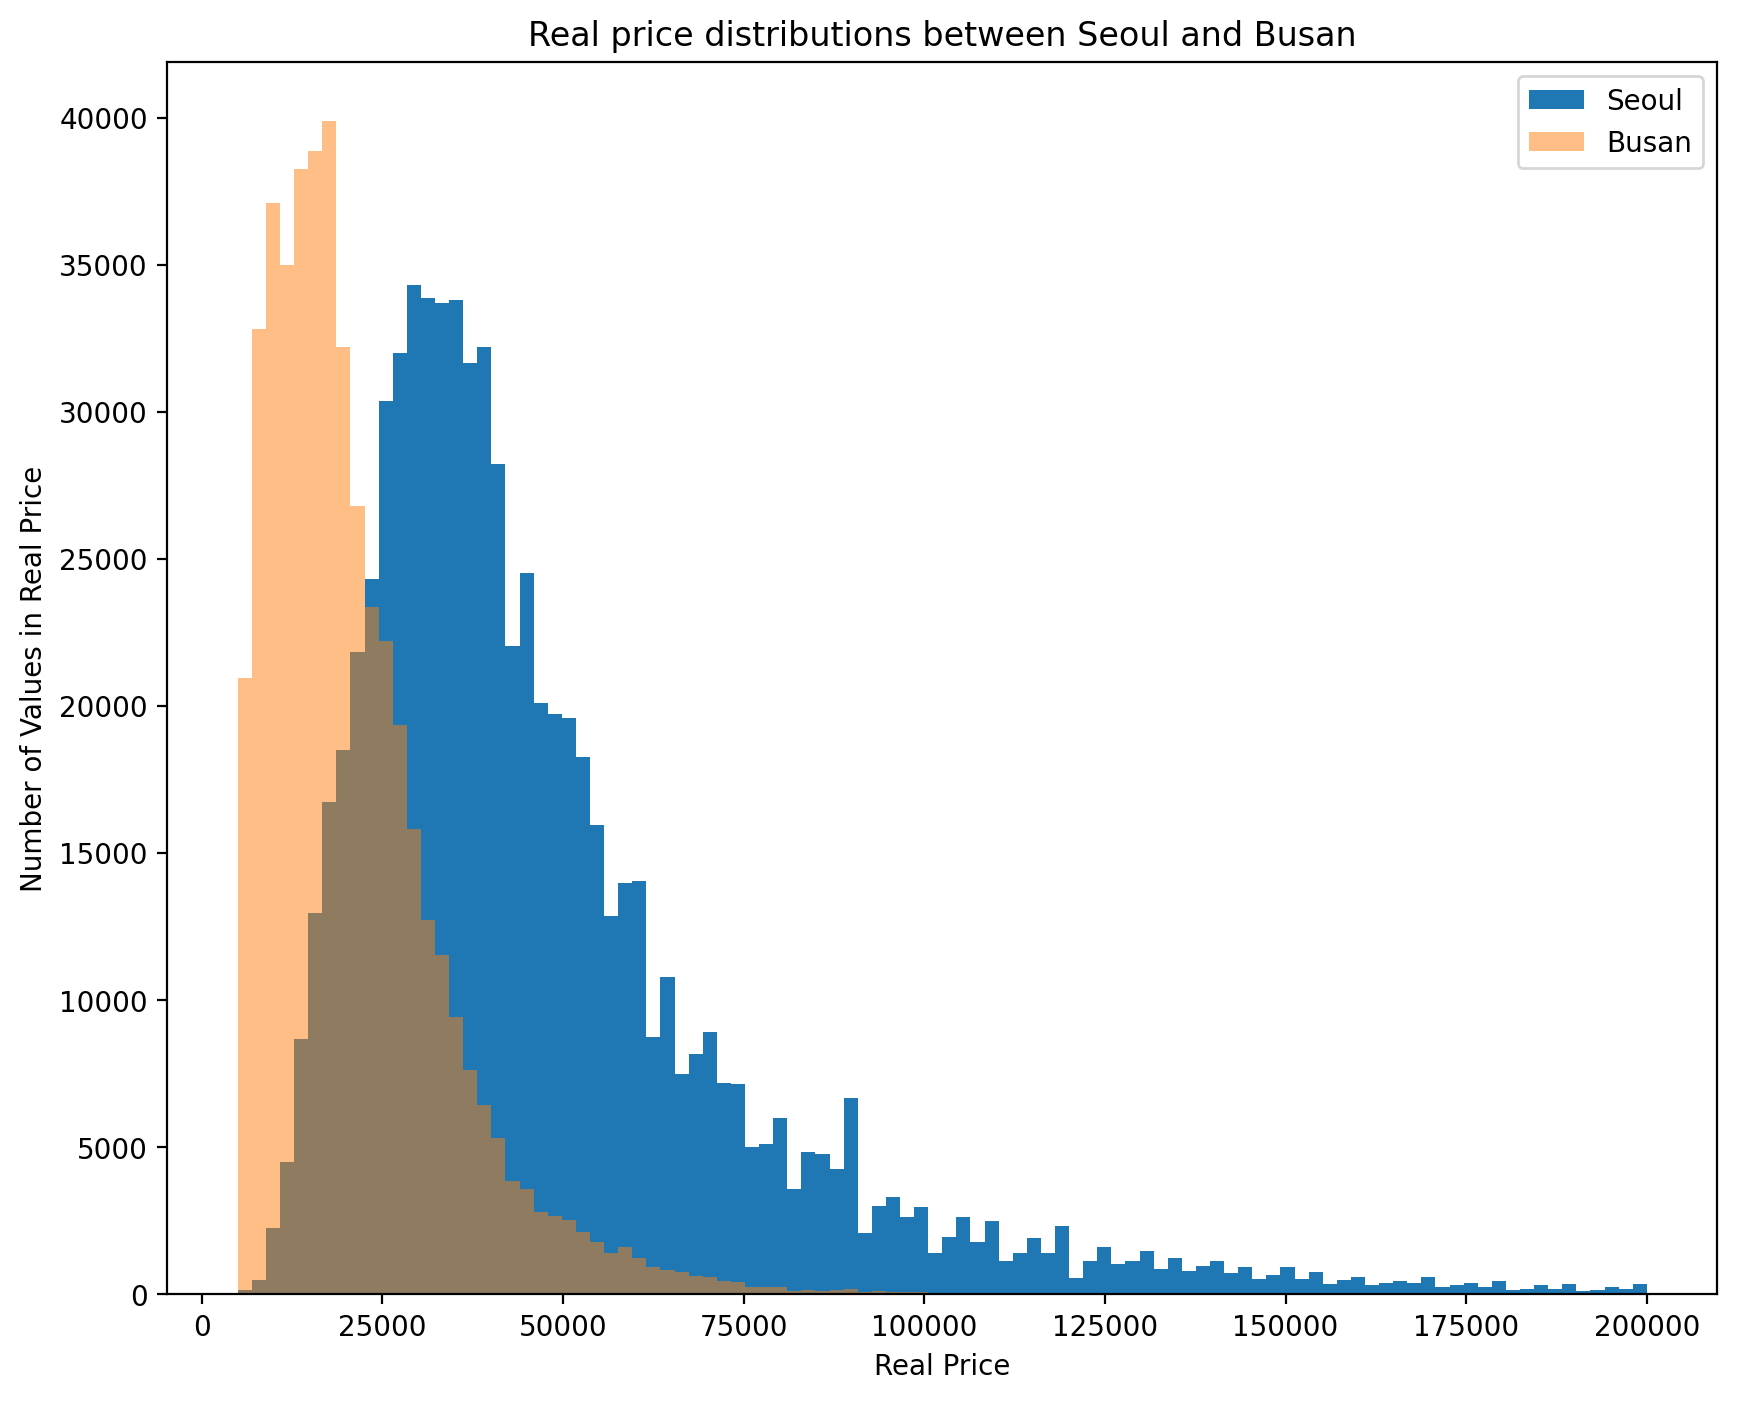

In [ ]:
# 서울과 부산 간 실거래가 히스토그램 비교하기(5천만원 이상, 20억 이하 기준)
x1 = train_seoul_df[(train_seoul_df['transaction_real_price'] >= 5000) & (train_seoul_df['transaction_real_price'] <= 200000)]['transaction_real_price']
x2 = train_busan_df[(train_busan_df['transaction_real_price'] >= 5000) & (train_busan_df['transaction_real_price'] <= 200000)]['transaction_real_price']

# 축 그리기
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=100, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=100, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Real Price')
plt.ylabel('Number of Values in Real Price')
ax1.set_title('Real price distributions between Seoul and Busan')

plt.legend(['Seoul', 'Busan'])

# 보여주기
plt.show()

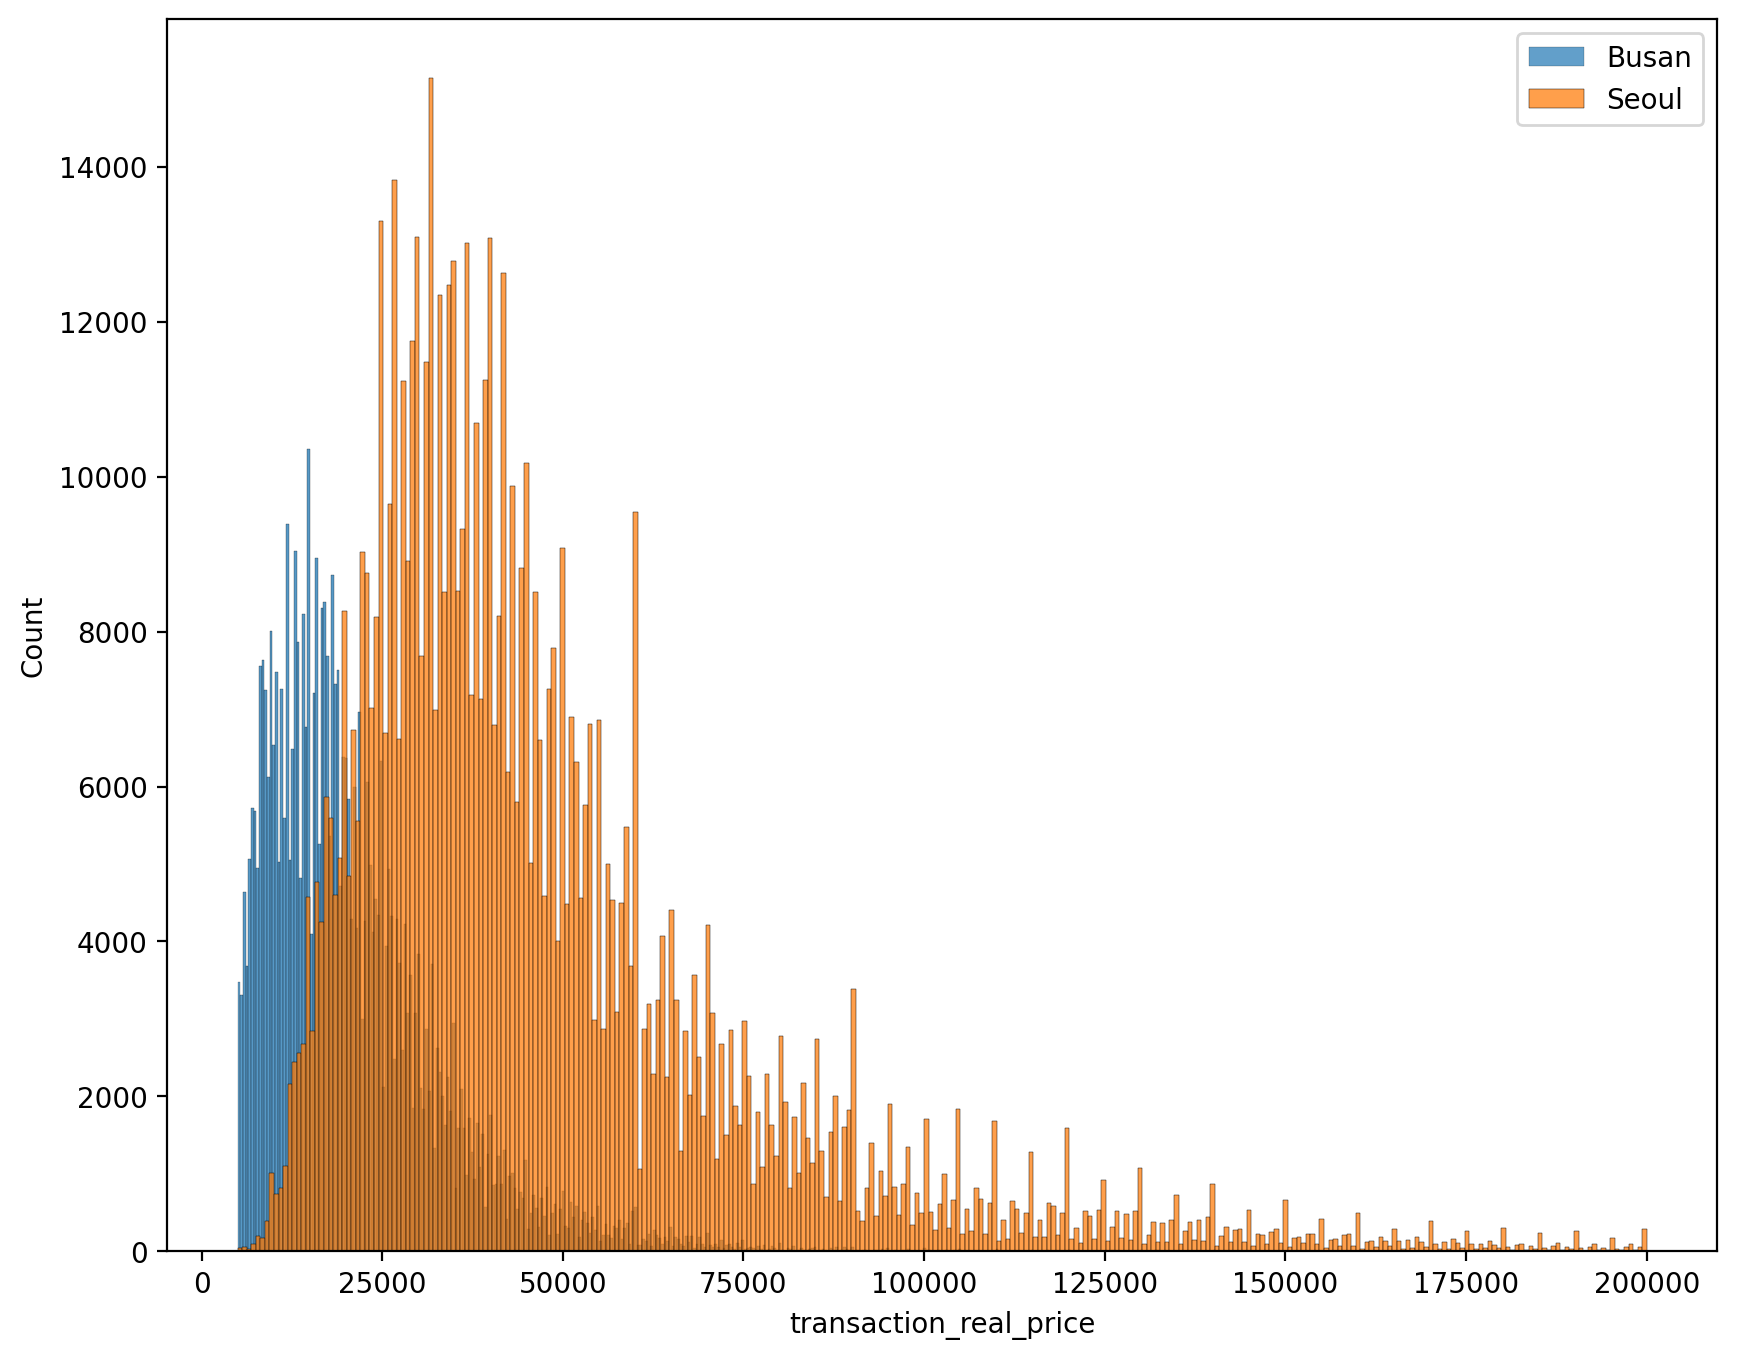

In [ ]:
# 서울과 부산 간 실거래가 히스토그램 비교하기(5천만원 이상, 20억 이하 기준)
# seaborn으로도 그려보기
fig = plt.figure(figsize=(10, 8))

# total = train_df[(train_df['transaction_real_price'] >= 5000) & (train_df['transaction_real_price'] <= 200000)]['transaction_real_price']
seoul = train_seoul_df[(train_seoul_df['transaction_real_price'] >= 5000) & (train_seoul_df['transaction_real_price'] <= 200000)]['transaction_real_price']
busan = train_busan_df[(train_busan_df['transaction_real_price'] >= 5000) & (train_busan_df['transaction_real_price'] <= 200000)]['transaction_real_price']

# sns.histplot(total, label="Total").patches[0].set_alpha(0.2)
sns.histplot(busan, label="Busan").patches[0].set_alpha(0.7)
# legend()를 이용하여 label을 표시해줍니다.
sns.histplot(seoul, label="Seoul").legend()

### 1.4.6  히스토그램을 통해 train.csv 데이터의 주요 수치형 변수들의 분포 확인

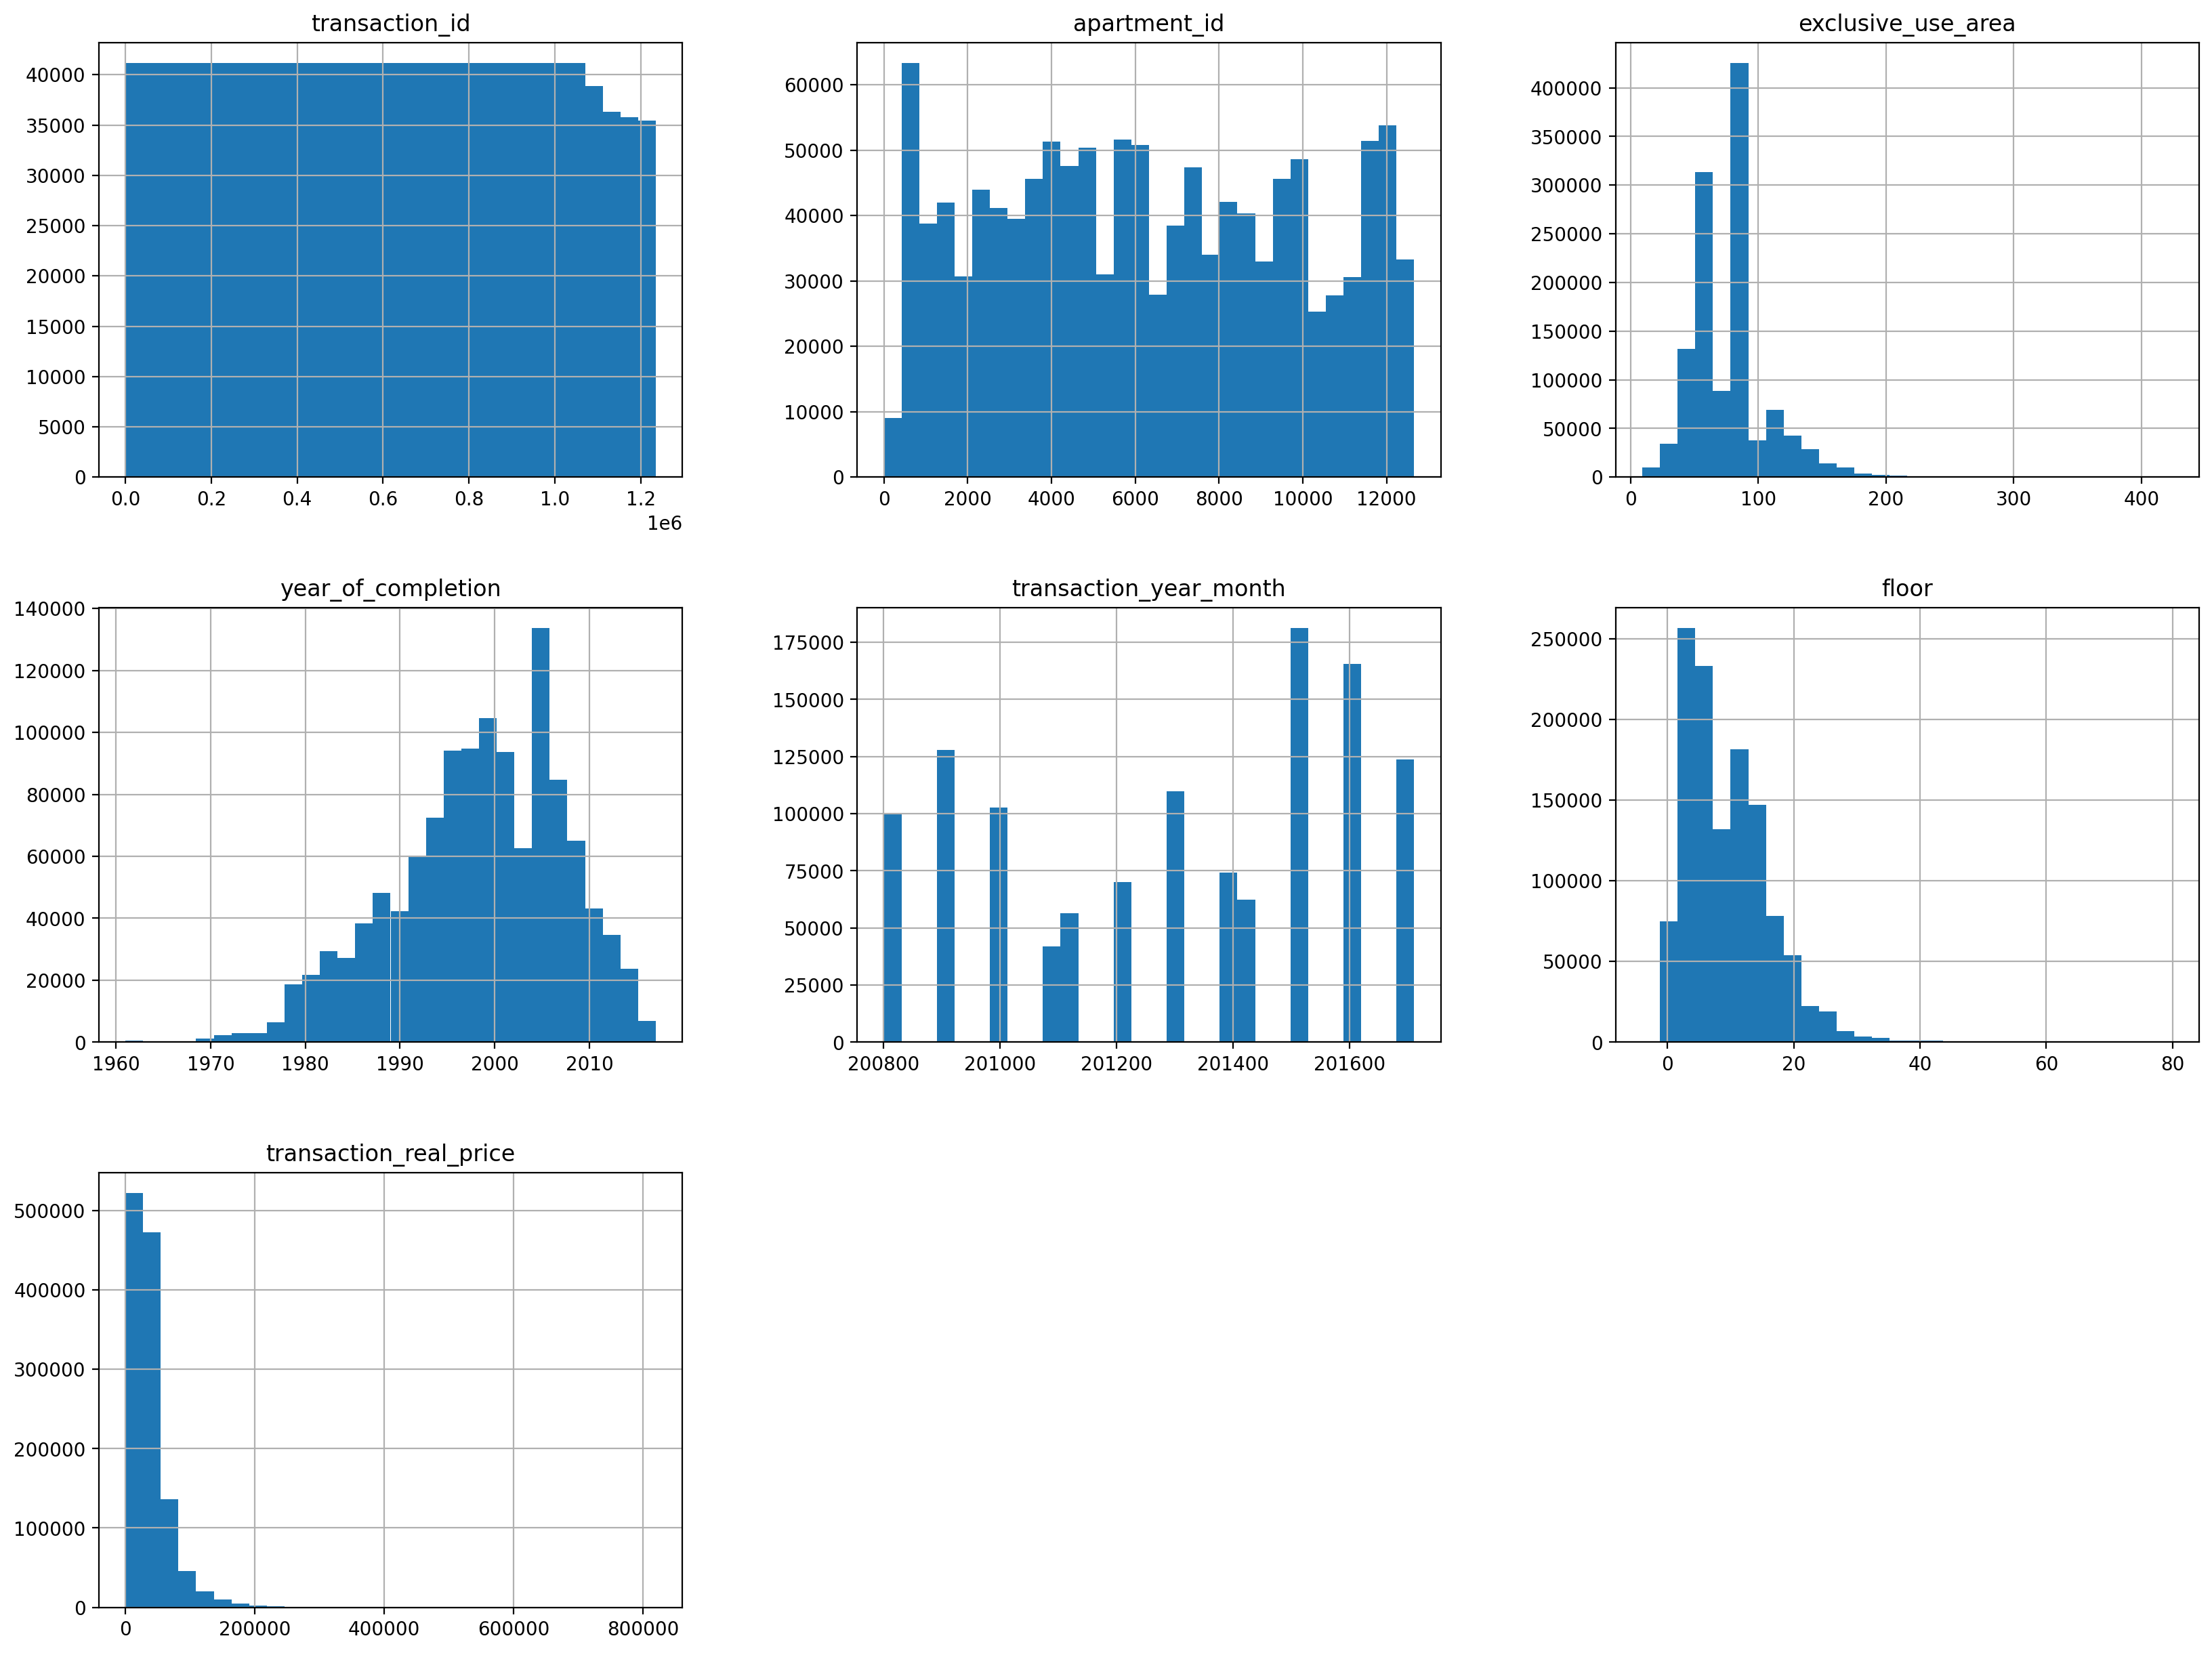

In [ ]:
# 데이터의 분포 확인
# 데이터의 분포를 확인하기 위해 히스토그램을 그립니다. 여기서는 주요 수치형 변수들의 분포를 확인합니다
# 주요 수치형 변수들의 히스토그램
train = train_df.copy()
train.hist(bins=30, figsize=(20, 15))
plt.show()


#### **1.4.6.1 히스토그램을 통해 train.csv 데이터의 주요 수치형 변수들의 분포를 분석**  

1. transaction_id   
분포: transaction_id는 고유 식별자이므로, 모든 값이 고르게 분포하고 있습니다.  
해석: 이 변수는 *고유 식별자*이므로 분석이나 모델링에 직접적으로 사용되지 않습니다.     

2. apartment_id   
분포: apartment_id도 고유 식별자로, 값이 고르게 분포하는 경향을 보입니다.  
해석: 이 변수도 *고유 식별자*이므로 분석이나 모델링에 직접적으로 사용되지 않습니다.    

3. exclusive_use_area    
분포: 전용면적의 분포는 오른쪽으로 길게 늘어진 비대칭 분포(오른쪽 꼬리가 긴 분포)를 보입니다. *대부분의 전용면적은 50에서 150 사이에 집중*되어 있습니다.    
해석: 전용면적은* 실거래가와 강한 양의 상관관계*를 가지며, 중요한 예측 변수로 사용될 수 있습니다. 데이터의 왜곡을 줄이기 위해 로그 변환 또는 다른 변환을 고려할 수 있습니다.      

4. year_of_completion    
분포: 설립연도는 *1970년대에서 2000년대 초반에 집중된 정규분포*에 가까운 형태를 보입니다. 최근 설립된 아파트가 더 많은 경향이 있습니다.  
해석: 설립연도는 실거래가와 약한 양의 상관관계를 가지지만, *아파트의 연식이 중요한 예측 변수*로 사용될 수 있습니다.    

5. transaction_year_month  
분포: 거래년월의 분포는 특정 시기에 거래가 집중된 경향을 보입니다. 특히 *2014년과 2016년에 거래가 많았습니다.*  
해석: 거래 시기의 변동성은 시장의 변화를 반영할 수 있습니다. 특정 시기의 거래량 증가나 감소를 분석하여 시장 트렌드를 파악할 수 있습니다.    

6. floor  
분포: 층수의 분포는 *왼쪽으로 치우친 형태*를 보입니다. 대부분의 아파트가 20층 이하에 위치하고 있습니다.  
해석: 층수는 실거래가와 약한 양의 상관관계를 가지며, 고*층 아파트의 경우 가격이 높을 가능성*이 있습니다. 이 변수도 중요한 예측 변수로 사용될 수 있습니다.    

7. transaction_real_price  
분포: 실거래가의 분포는 오른쪽으로 길게 늘어진 비대칭 분포(오른쪽 꼬리가 긴 분포)를 보입니다. *대부분의 거래가 500,000 이하*에서 이루어지고 있습니다.  
해석: 실거래가는 종속 변수로 사용될 것입니다. 데이터의 왜곡을 줄이기 위해 로그 변환 또는 다른 변환을 고려할 수 있습니다.  
  
## **종합 해석**    
**왜도와 이상치:** exclusive_use_area와 transaction_real_price는 오른쪽 꼬리가 긴 분포를 보이므로, 왜도(skewness)를 줄이기 위한 변환이 필요할 수 있습니다.  

**중요 변수:** exclusive_use_area, year_of_completion, transaction_year_month, floor 등은 실거래가 예측에 중요한 변수가 될 수 있습니다.  

**거래 시기:** transaction_year_month는 시장 트렌드를 반영하며, 시계열 분석이나 시간에 따른 변동성을 고려할 수 있습니다.


In [ ]:
# train.csv 데이터의 범주형 및 수치형 변수를 모두 포함하여 왜도와 관련된 데이터 분석을 수행하고, 변환의 필요성을 평가하는 과정


# 단계 1: 데이터 로드 및 기본 정보 확인

# 데이터 로드

# 데이터 기본 정보 확인
print(train.head())
print(train.info())
print("*"*200)
# 단계 2: 범주형 변수 인코딩
from sklearn.preprocessing import LabelEncoder

# 범주형 변수와 수치형 변수 구분
categorical_columns = ['city', 'dong', 'transaction_date']
numeric_columns = ['apartment_id', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor', 'transaction_real_price']

# LabelEncoder 초기화
le = LabelEncoder()

# 각 범주형 컬럼에 대해 인코딩하여 새로운 컬럼으로 추가
for column in categorical_columns:
    train[column + '_Encoded'] = le.fit_transform(train[column])

# 인코딩된 데이터프레임 확인
print(train.head())
print("*"*200)

# 단계 3: 수치형 변수의 왜도 계산
# 인코딩된 수치형 변수 포함하여 새로운 numeric_columns 리스트 생성
encoded_columns = [col + '_Encoded' for col in categorical_columns]
all_numeric_columns = numeric_columns + encoded_columns

# 수치형 변수의 왜도 계산
numeric_skewness = train[all_numeric_columns].skew()
print("Numeric Skewness:\n", numeric_skewness)

   transaction_id  apartment_id   city dong   jibun       apt  \
0               0          7622  서울특별시  신교동    6-13  신현(101동)   
1               1          5399  서울특별시  필운동     142    사직파크맨션   
2               2          3578  서울특별시  필운동   174-1    두레엘리시안   
3               3         10957  서울특별시  내수동      95     파크팰리스   
4               4         10639  서울특별시  내수동  110-15      킹스매너   

             addr_kr  exclusive_use_area  year_of_completion  \
0  신교동 6-13 신현(101동)               84.82                2002   
1     필운동 142 사직파크맨션               99.17                1973   
2   필운동 174-1 두레엘리시안               84.74                2007   
3       내수동 95 파크팰리스              146.39                2003   
4    내수동 110-15 킹스매너              194.43                2004   

   transaction_year_month transaction_date  floor  transaction_real_price  
0                  200801            21~31      2                   37500  
1                  200801             1~10      6                   2000


#### **1.4.6.2 왜도 (Skewness) 정의**
 왜도는 ***데이터 분포의 비대칭성을 나타내는 지표***입니다. 왜도의 값에 따라 분포의 형태를 알 수 있습니다.

 **정의:**  
 왜도는 데이터 분포의 비대칭성을 측정하는 통계적 척도입니다.    
 평균을 중심으로 데이터가 얼마나 한쪽으로 치우쳐 있는지를 나타냅니다.  

**왜도 값의 해석:**   

1. 왜도 = 0 :  데이터가 완벽한 대칭 분포를 이룹니다. **(정규 분포)**      
  
    
2.  **왜도 > 0 : 오른쪽 꼬리가 긴 분포**  
              (양의 왜도) 평균보다 큰 값들이 더 넓게 퍼져있습니다.       

                  
3. 왜도 < 0 :  왼쪽 꼬리가 긴 분포     
             (음의 왜도) 평균보다 작은 값들이 더 넓게 퍼져 있습니다.

# STEP 2. 데이터 전처리

## 2.1 중복 데이터 확인 및 처리

In [ ]:
train_df.duplicated().sum()

0

## 2.2 결측치 확인 및 처리

In [ ]:
# 결측치 확인
train_df.isnull().sum()

apartment_id                0
exclusive_use_area          0
year_of_completion          0
transaction_year_month      0
floor                       0
transaction_real_price      0
city_Encoded                0
dong_Encoded                0
transaction_date_Encoded    0
dtype: int64

## 2.3 이상치 확인 및 처리

## 2.4 feature 가공
- 주소에서 '구' 정보를 추출해 특성으로 사용할 필요 있는지 체크!
- 서울시만 해도 '구' 단위로도 아파트 가격이 차이가 많이 날 수 있으므로.

In [ ]:
# 수치형 데이터 컬럼, 범주형 데이터 컬럼 구분
categorical_columns = ['city', 'dong', 'transaction_date']
numeric_columns = ['apartment_id', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor', 'transaction_real_price']

In [ ]:
# 범주형 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
le = LabelEncoder()

# 각 범주형 컬럼에 대해 인코딩하여 새로운 컬럼으로 추가
for column in categorical_columns:
    train_df[column + '_Encoded'] = le.fit_transform(train_df[column])

train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,1,257,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1,437,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1,437,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,1,68,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,1,68,5


In [ ]:
# 필요 없는 컬럼 제거
train_df = train_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)

In [ ]:
# 컬럼 제거 확인
train_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,37500,1,257,5
1,5399,99.1700,1973,200801,6,20000,1,437,1
2,3578,84.7400,2007,200801,6,38500,1,437,1
3,10957,146.3900,2003,200801,15,118000,1,68,0
4,10639,194.4300,2004,200801,3,120000,1,68,5
...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0
1216549,9578,84.9923,2012,201711,7,30750,0,382,4
1216550,9578,84.9923,2012,201711,9,29500,0,382,4
1216551,9586,101.7400,2008,201711,7,26700,0,382,4


## 2.5 Heatmap 작성

In [ ]:
# Heatmap 작성을 위한 상관관계 매트릭스 생성
correlation_matrix = train_df.corr()

<Axes: >

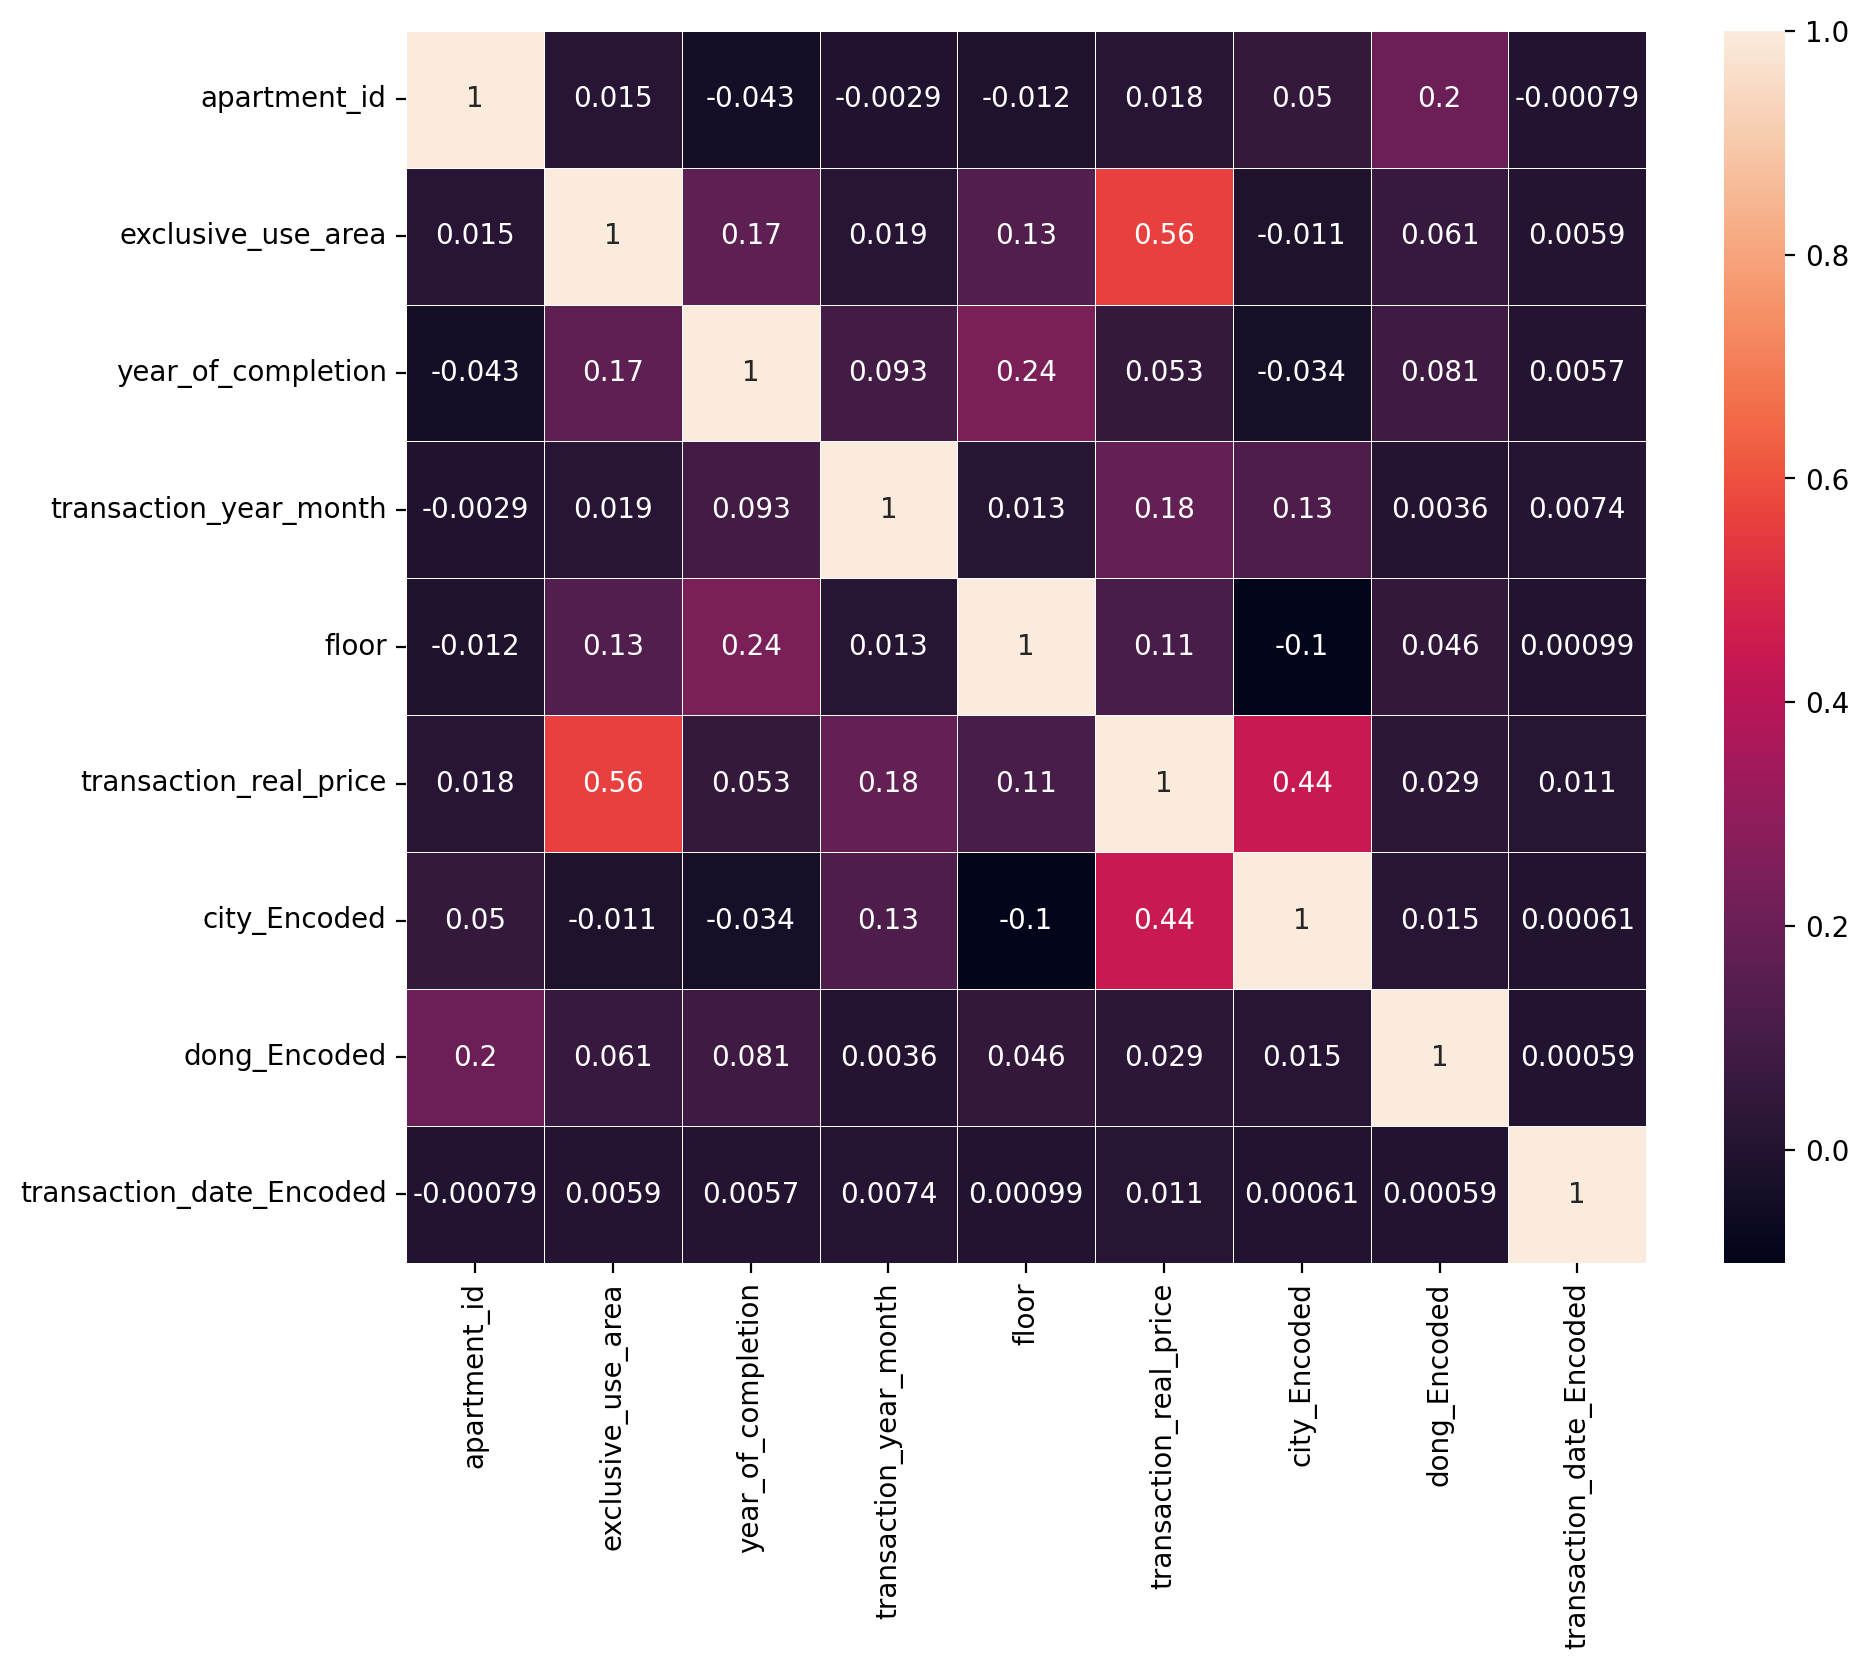

In [ ]:
# Heatmap 그래프 그리기
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, linewidths=.2, annot=True)

## 2.6 데이터 전처리

In [ ]:
# 특성(X)과 타겟(y) 분리
X = train_df.drop(columns=['transaction_real_price'])
y = train_df['transaction_real_price']

In [ ]:
X

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,1,257,5
1,5399,99.1700,1973,200801,6,1,437,1
2,3578,84.7400,2007,200801,6,1,437,1
3,10957,146.3900,2003,200801,15,1,68,0
4,10639,194.4300,2004,200801,3,1,68,5
...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,0,382,0
1216549,9578,84.9923,2012,201711,7,0,382,4
1216550,9578,84.9923,2012,201711,9,0,382,4
1216551,9586,101.7400,2008,201711,7,0,382,4


In [ ]:
y

0           37500
1           20000
2           38500
3          118000
4          120000
            ...  
1216548     22000
1216549     30750
1216550     29500
1216551     26700
1216552     28800
Name: transaction_real_price, Length: 1216553, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   apartment_id              1216553 non-null  int64  
 1   exclusive_use_area        1216553 non-null  float64
 2   year_of_completion        1216553 non-null  int64  
 3   transaction_year_month    1216553 non-null  int64  
 4   floor                     1216553 non-null  int64  
 5   city_Encoded              1216553 non-null  int64  
 6   dong_Encoded              1216553 non-null  int64  
 7   transaction_date_Encoded  1216553 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 74.3 MB


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 특성 스케일링
scaler_X = StandardScaler()
X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# 타겟 스케일링
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.924525,1.255593,0.749423,-0.665573,-0.505651,0.799610,1.138313,-0.932685
1,0.984594,-0.312023,-1.375498,-1.701585,-0.051317,-1.250609,0.554647,1.081624
2,-1.600600,-0.626439,-0.257118,-1.016647,1.463127,-1.250609,-1.612212,1.585202
3,-0.314289,0.231188,0.637585,-1.343627,0.554460,-1.250609,-1.313083,-0.429108
4,-1.006059,-0.173007,0.749423,0.711188,0.100127,-1.250609,-0.984771,-0.932685
...,...,...,...,...,...,...,...,...
973237,0.721688,1.261771,0.973099,-0.669015,-0.051317,0.799610,1.554175,-0.429108
973238,-1.195205,1.344837,0.302072,1.041610,-1.111428,0.799610,-1.137984,-0.932685
973239,0.922849,-0.625752,0.190234,1.065703,0.251571,0.799610,1.138313,-0.429108
973240,-0.931182,-0.545432,-1.039984,0.009040,-0.808539,-1.250609,-0.787784,-0.932685


In [ ]:
X_test

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.603506,-0.985820,-2.605716,1.399568,-0.808539,0.799610,0.722451,1.585202
1,-1.512034,-0.627125,-0.033442,0.036575,-0.051317,0.799610,0.634901,-0.932685
2,-0.703479,0.473329,1.755965,1.062262,-1.262873,0.799610,0.977805,-0.429108
3,-0.257573,-1.131700,-2.382040,-1.687817,-0.657095,0.799610,-0.153048,-0.429108
4,0.273826,-0.851266,-1.263660,0.711188,-0.808539,0.799610,-0.999363,1.585202
...,...,...,...,...,...,...,...,...
243306,-0.108938,-0.631931,-0.257118,-0.672456,-0.354206,-1.250609,-1.101505,-0.429108
243307,-1.017514,2.923712,-0.816308,-0.321383,0.705905,-1.250609,0.810001,-0.932685
243308,0.982918,-0.446577,-1.711012,-1.357395,-0.808539,0.799610,-0.014427,-0.429108
243309,-1.612334,0.233056,-0.704470,0.353230,1.311682,-1.250609,1.539583,-0.932685


In [ ]:
y_train

array([[0.05110379],
       [0.02000244],
       [0.00904988],
       ...,
       [0.03195512],
       [0.00975729],
       [0.04024881]])

In [ ]:
y_test

array([[0.03768752],
       [0.03671179],
       [0.11147701],
       ...,
       [0.06391023],
       [0.02549091],
       [0.17246006]])

# STEP 3. 모델링과 튜닝

## 3.1 베이스라인 모델 훈련 및 검증

### 3.1.1 모델 정의, 컴파일, 훈련

In [ ]:
import tensorflow as tf

# 신경망 모델 정의
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 정의, 컴파일을 진행해 주세요.
# import tensorflow as tf

# with tf.device('/GPU:0'):
#   # 신경망 모델 정의
#   model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
#   ])

#   # 모델 컴파일
#   model.compile(optimizer='adam',
#                 loss='mean_squared_error',
#                 metrics=['mean_absolute_error'])

In [ ]:
# 텐서보드용 로그 절대 경로 생성
import os

# 현재 작업 디렉토리 출력
# cwd = os.getcwd()
# print("Current working directory:", cwd)

# 예: 작업 디렉토리를 변경
# cwd = os.chdir("/path/to/your/directory")

# cwd = cwd.replace('\\', '/')	# 윈도우에서 필요
# tensorboard_log_dir = cwd + '/logs/fit/'
# tensorboard_log_dir

# aiffel_home_dir = os.getenv('Aiffel_Home')		# 윈도우 환경에서 '사용자 환경변수'로 아예 추가해 둠. (단축키:Win+PauseBreak)
# aiffel_home_dir = aiffel_home_dir.replace("\\", "/")		# 디렉토리 경로 문자열이 이스케이프 처리된 것을 일반 문자열로 변환.
# tensorboard_log_dir = aiffel_home_dir + "/Official_Course/Datathon/"
# tensorboard_log_dir

'C:/Users/freen/OneDrive - 이우고등학교/프로그래밍 코드 모음/파이썬/아이펠 온라인8기 코어과정/AIFFEL_8th_Core_freentour/Official_Course/Datathon/'

In [ ]:
import datetime

# 텐서보드용 로그 위치 지정 (절대경로여야 함)
# log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# callback  리스트
callbacks_list = [
  tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_error",
    patience=10,
  ),
  tf.keras.callbacks.ModelCheckpoint(
    filepath="models/best_model_baseline.keras",
    monitor="val_loss",
    save_best_only=True,
    # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
    # save_format='h5'
  ),
  # tf.keras.callbacks.TensorBoard(
  #   log_dir = log_dir,
  # )
]

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=callbacks_list)

Epoch 1/100
12166/12166 [==============================] - 28s 2ms/step - loss: 7.2839e-04 - mean_absolute_error: 0.0157 - val_loss: 3.9133e-04 - val_mean_absolute_error: 0.0118
Epoch 2/100
12166/12166 [==============================] - 27s 2ms/step - loss: 3.5372e-04 - mean_absolute_error: 0.0115 - val_loss: 3.1932e-04 - val_mean_absolute_error: 0.0109
Epoch 3/100
12166/12166 [==============================] - 26s 2ms/step - loss: 3.0804e-04 - mean_absolute_error: 0.0107 - val_loss: 2.8714e-04 - val_mean_absolute_error: 0.0102
Epoch 4/100
12166/12166 [==============================] - 26s 2ms/step - loss: 2.8555e-04 - mean_absolute_error: 0.0103 - val_loss: 2.8576e-04 - val_mean_absolute_error: 0.0106
Epoch 5/100
12166/12166 [==============================] - 25s 2ms/step - loss: 2.6841e-04 - mean_absolute_error: 0.0100 - val_loss: 2.6703e-04 - val_mean_absolute_error: 0.0099
Epoch 6/100
12166/12166 [==============================] - 27s 2ms/step - loss: 2.5998e-04 - mean_absolute_err

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 훈련을 진행해 주세요.
# import datetime

# with tf.device('/GPU:0'):
#   # 텐서보드용 로그 위치 지정 (절대경로여야 함)
#   # log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#   # callback  리스트
#   callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(
#       monitor="val_mean_absolute_error",
#       patience=10,
#     ),
#     tf.keras.callbacks.ModelCheckpoint(
#       filepath="models/best_model_baseline.keras",
#       monitor="val_loss",
#       save_best_only=True,
#       # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
#       # save_format='h5'
#     ),
#     # tf.keras.callbacks.TensorBoard(
#     #   log_dir = log_dir,
#     # )
#   ]

#   # 모델 훈련
#   history = model.fit(X_train, y_train,
#                       epochs=100,
#                       batch_size=32,
#                       validation_split=0.2,
#                       callbacks=callbacks_list)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 구조 시각화
# EarlyStopping 콜백 적용한 경우에는 FileNotFoundError 발생함!
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True, to_file='apartment_baseline_model.png')

In [ ]:
# history 객체의 key 이름 확인
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

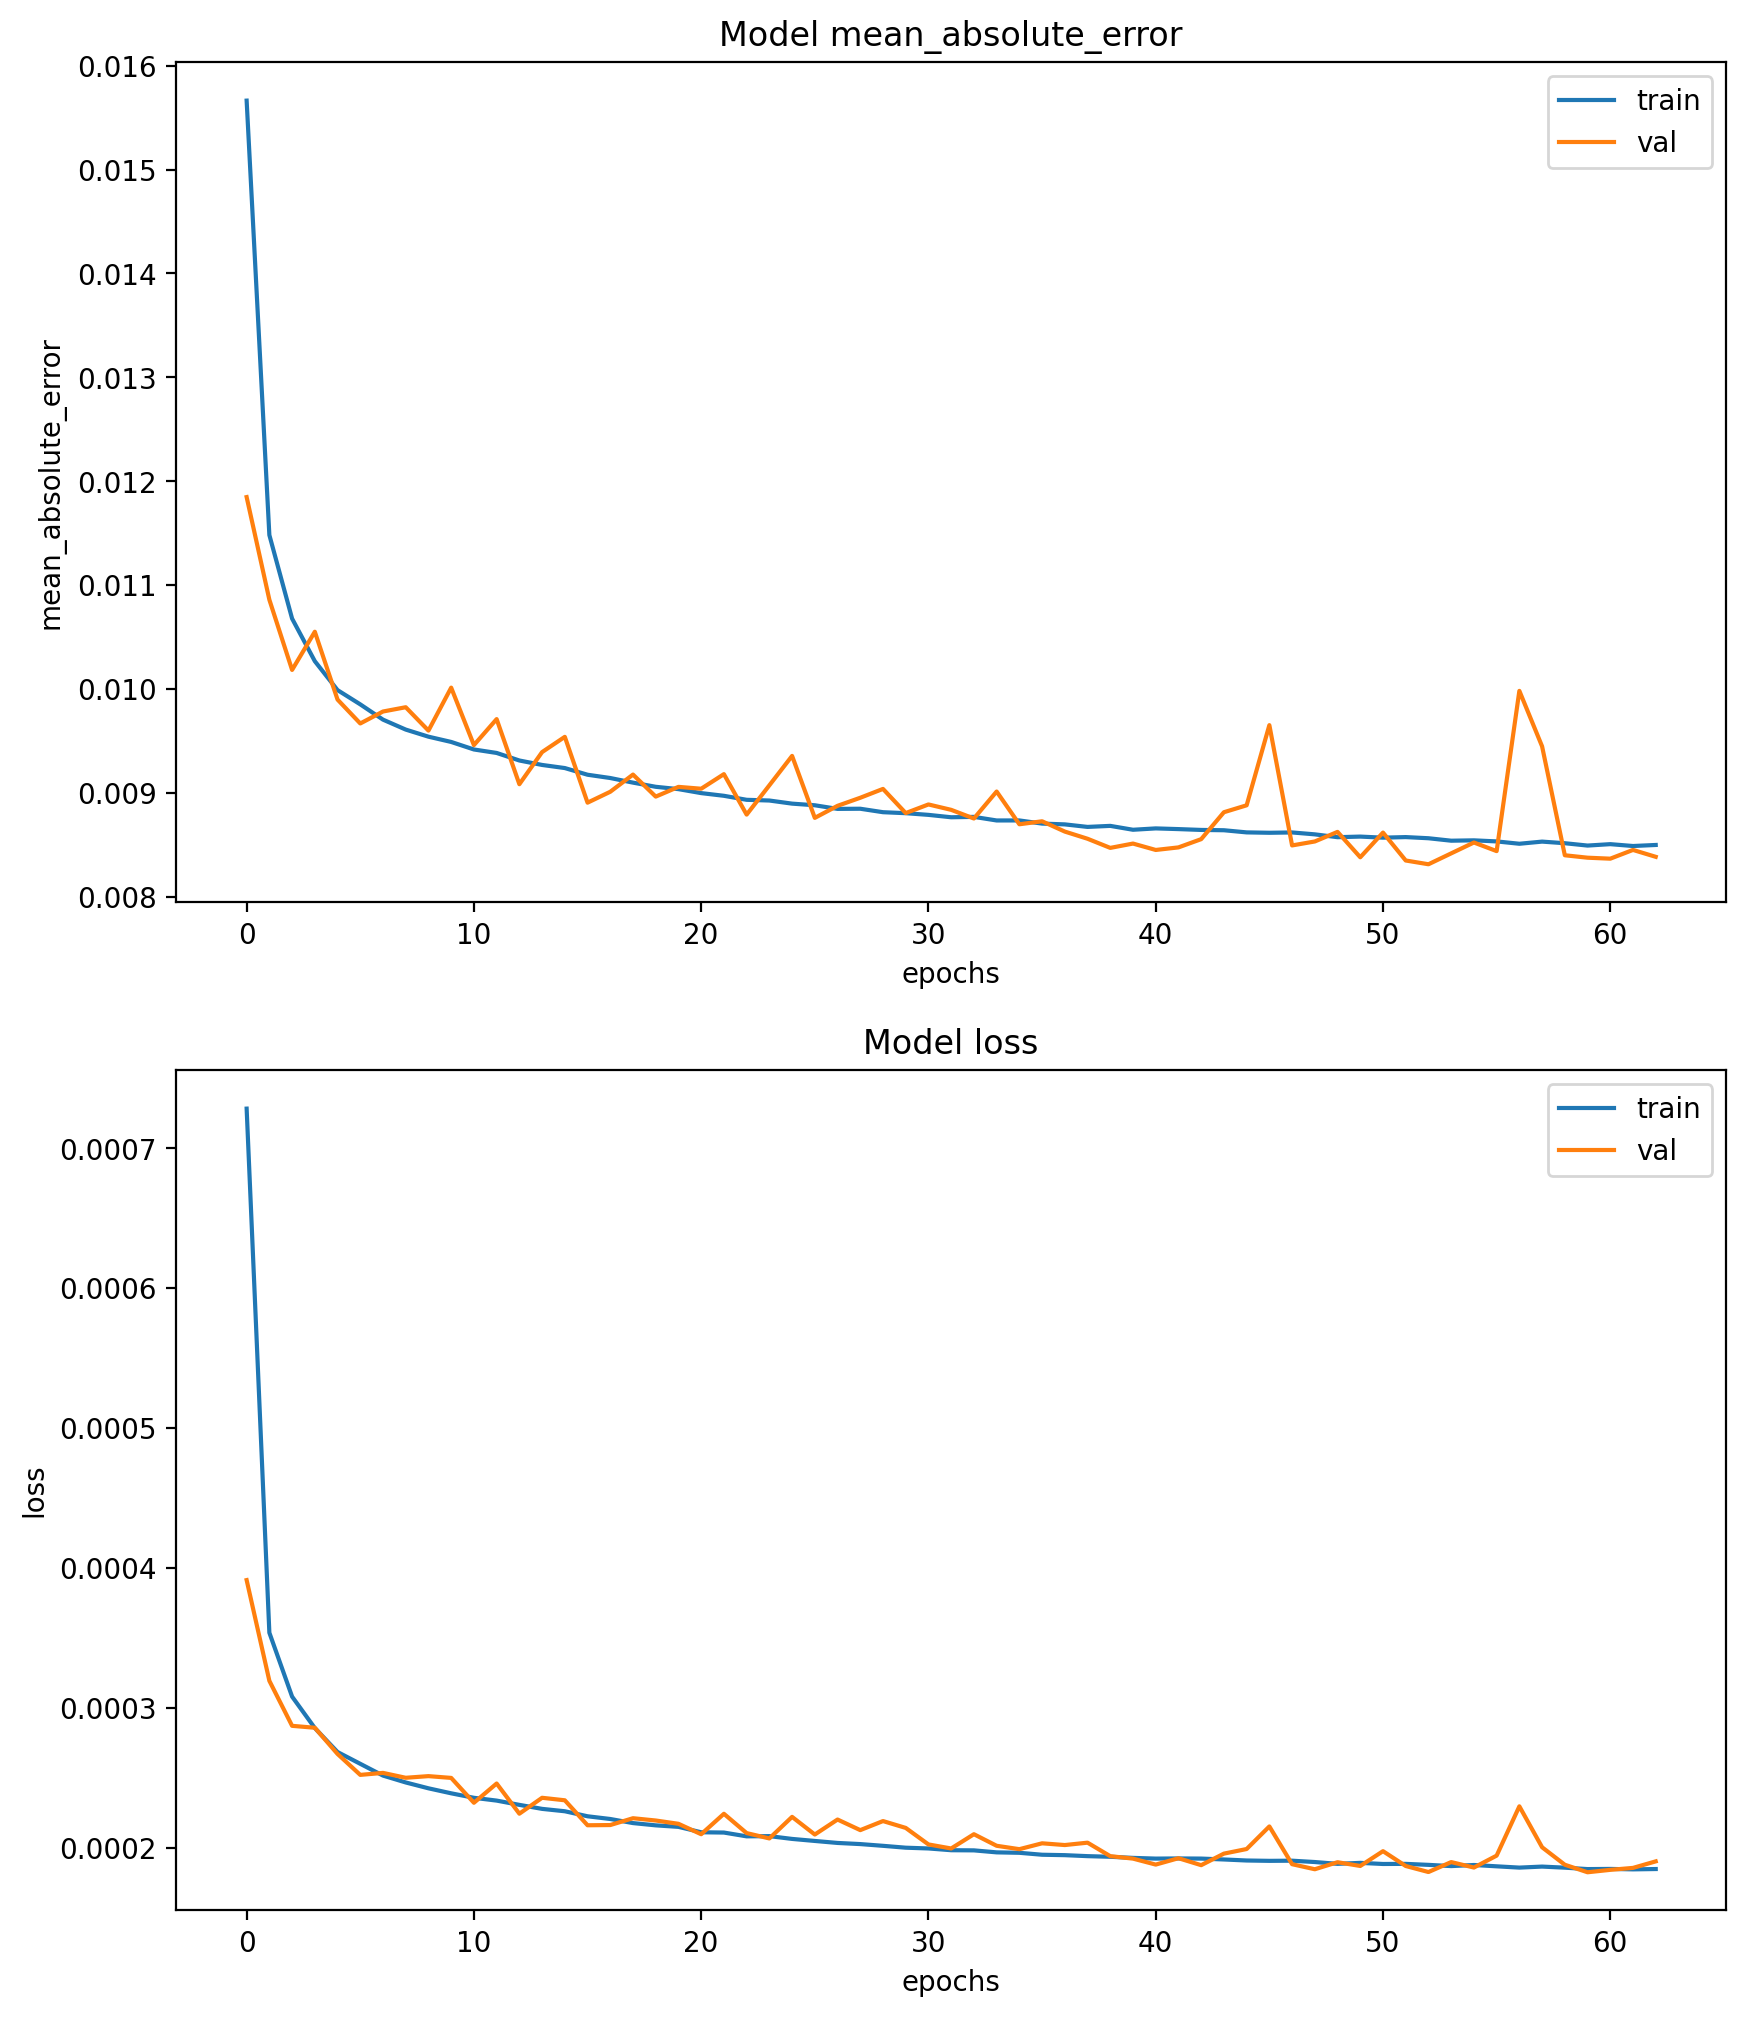

In [ ]:
# 그래프 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax = ax.ravel()

for i, met in enumerate(['mean_absolute_error', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

### 3.1.2 모델 평가 및 예측

In [ ]:
# ModelCheckpoint 콜백에 의해 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model("models/best_model_baseline.keras")

In [ ]:
# 모델 평가
loss, mae = loaded_model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

7604/7604 [==============================] - 11s 1ms/step - loss: 1.7956e-04 - mean_absolute_error: 0.0084
Test Mean Absolute Error: 0.008359161205589771


In [ ]:
# 예측 수행
y_pred = loaded_model.predict(X_test)

# 예측값을 원래 스케일로 되돌리기
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# 예측 결과 확인 (예: 첫 5개 예측 결과)
print("Predictions:", y_pred_rescaled[:10])
print("True Values:", scaler_y.inverse_transform(y_test[:10]))

7604/7604 [==============================] - 9s 1ms/step
Predictions: [[42933.855]
 [37976.895]
 [77213.45 ]
 [31867.176]
 [23595.4  ]
 [59380.816]
 [45257.508]
 [60871.26 ]
 [48495.95 ]
 [45897.04 ]]
True Values: [[31000.]
 [30200.]
 [91500.]
 [23000.]
 [22000.]
 [41200.]
 [32900.]
 [40000.]
 [36550.]
 [35500.]]


## 3.2 데이터셋 분리 모델 훈련 및 검증

### 3.2.1 데이터셋 분리 모델의 데이터 준비 및 전처리
- 서울 지역 중간 면적, 중간 금액대 거래 내역으로 데이터셋 범위를 한정해 훈련 진행(왜도 문제는 해결하지 않음)

#### 3.2.1.1 범주형 데이터 인코딩

In [ ]:
# 변수 이름이 너무 길어서 단축형으로 사용
train_seoul_normal_df = train_seoul_area_normal_price_normal_df

In [ ]:
# 수치형 데이터 컬럼, 범주형 데이터 컬럼 구분
categorical_columns = ['city', 'dong', 'transaction_date']
numeric_columns = ['apartment_id', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor', 'transaction_real_price']

In [ ]:
# 범주형 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
le = LabelEncoder()

# 각 범주형 컬럼에 대해 인코딩하여 새로운 컬럼으로 추가
for column in categorical_columns:
    train_seoul_normal_df[column + '_Encoded'] = le.fit_transform(train_seoul_normal_df[column])

train_seoul_normal_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,0,166,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,0,280,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,0,280,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,0,39,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,0,39,5


#### 3.2.1.2 인코딩 후 필요 없는 컬럼 제거

In [ ]:
# 필요 없는 컬럼 제거
train_seoul_normal_df = train_seoul_normal_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)

In [ ]:
# 컬럼 제거 확인
train_seoul_normal_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.82,2002,200801,2,37500,0,166,5
1,5399,99.17,1973,200801,6,20000,0,280,1
2,3578,84.74,2007,200801,6,38500,0,280,1
3,10957,146.39,2003,200801,15,118000,0,39,0
4,10639,194.43,2004,200801,3,120000,0,39,5
...,...,...,...,...,...,...,...,...,...
435734,686,84.53,2009,201711,4,56000,0,6,1
435735,684,84.53,2009,201711,10,57000,0,6,0
435736,682,84.74,2009,201711,3,56500,0,6,4
435737,680,84.74,2009,201711,9,55500,0,6,4


#### 3.2.1.3 데이터 전처리

In [ ]:
# 특성(X)과 타겟(y) 분리
X = train_seoul_normal_df.drop(columns=['transaction_real_price'])
y = train_seoul_normal_df['transaction_real_price']

In [ ]:
X

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.82,2002,200801,2,0,166,5
1,5399,99.17,1973,200801,6,0,280,1
2,3578,84.74,2007,200801,6,0,280,1
3,10957,146.39,2003,200801,15,0,39,0
4,10639,194.43,2004,200801,3,0,39,5
...,...,...,...,...,...,...,...,...
435734,686,84.53,2009,201711,4,0,6,1
435735,684,84.53,2009,201711,10,0,6,0
435736,682,84.74,2009,201711,3,0,6,4
435737,680,84.74,2009,201711,9,0,6,4


In [ ]:
y

0          37500
1          20000
2          38500
3         118000
4         120000
           ...  
435734     56000
435735     57000
435736     56500
435737     55500
435738     63750
Name: transaction_real_price, Length: 435739, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435739 entries, 0 to 435738
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   apartment_id              435739 non-null  int64  
 1   exclusive_use_area        435739 non-null  float64
 2   year_of_completion        435739 non-null  int64  
 3   transaction_year_month    435739 non-null  int64  
 4   floor                     435739 non-null  int64  
 5   city_Encoded              435739 non-null  int64  
 6   dong_Encoded              435739 non-null  int64  
 7   transaction_date_Encoded  435739 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 26.6 MB


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 특성 스케일링
scaler_X = StandardScaler()
X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# 타겟 스케일링
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.748440,-0.792859,0.659322,-1.856373,-0.985240,0.0,0.716915,0.572872
1,-0.547881,1.358192,0.216806,-1.130359,-0.493635,0.0,-0.598204,-0.431544
2,-0.797946,-0.421677,-0.115081,-1.859847,-0.985240,0.0,-0.046324,1.577288
3,-1.068919,-0.417304,-0.004452,-0.432134,1.308915,0.0,-1.619770,1.577288
4,-0.195505,0.111361,-1.774518,0.234826,-0.002030,0.0,-1.408412,-0.431544
...,...,...,...,...,...,...,...,...
348586,-0.253770,-0.454422,0.548693,0.231353,-0.493635,0.0,-0.386846,-0.933752
348587,-1.486808,1.167232,0.548693,-0.793405,-1.149108,0.0,1.350991,-0.431544
348588,-0.616739,2.648269,0.880580,-1.151201,0.161838,0.0,0.928274,-0.933752
348589,-1.383102,-0.417789,-0.446969,-0.789931,0.981179,0.0,1.726739,1.075080


In [ ]:
X_test

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.631353,2.501526,-2.327663,-1.130359,-1.312976,0.0,1.069179,1.075080
1,-1.294729,-0.421677,0.106177,0.589149,-1.149108,0.0,-1.373185,-0.431544
2,1.028334,-0.417644,0.659322,0.571781,-0.002030,0.0,1.304022,-0.933752
3,-0.631236,-0.422070,1.654984,0.943472,-0.821371,0.0,0.399877,1.577288
4,1.604291,-0.419733,-0.004452,-1.502050,0.489574,0.0,-1.114858,-0.933752
...,...,...,...,...,...,...,...,...
87143,0.279813,-0.417304,0.106177,-0.463398,-0.985240,0.0,-0.633431,-0.431544
87144,-0.682252,0.408977,0.438064,0.252195,2.619861,0.0,0.035871,1.075080
87145,1.205358,-0.417061,0.438064,0.589149,-0.493635,0.0,1.280538,1.075080
87146,1.701863,2.077088,-1.221372,-1.488155,-0.985240,0.0,-0.539493,-0.933752


In [ ]:
y_train

array([[0.04210526],
       [0.37631579],
       [0.13105263],
       ...,
       [0.22      ],
       [0.08894737],
       [0.04473684]])

In [ ]:
y_test

array([[0.64210526],
       [0.15      ],
       [0.18947368],
       ...,
       [0.16789474],
       [0.56578947],
       [0.21315789]])

### 3.2.2 모델 정의, 컴파일, 훈련

In [ ]:
import tensorflow as tf

# 신경망 모델 정의
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 정의, 컴파일을 진행해 주세요.
# import tensorflow as tf

# with tf.device('/GPU:0'):
#   # 신경망 모델 정의
#   model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
#   ])

#   # 모델 컴파일
#   model.compile(optimizer='adam',
#                 loss='mean_squared_error',
#                 metrics=['mean_absolute_error'])

In [ ]:
# 텐서보드용 로그 절대 경로 생성
import os

# 현재 작업 디렉토리 출력
# cwd = os.getcwd()
# print("Current working directory:", cwd)

# 예: 작업 디렉토리를 변경
# cwd = os.chdir("/path/to/your/directory")

# cwd = cwd.replace('\\', '/')	# 윈도우에서 필요
# tensorboard_log_dir = cwd + '/logs/fit/'
# tensorboard_log_dir

# aiffel_home_dir = os.getenv('Aiffel_Home')		# 윈도우 환경에서 '사용자 환경변수'로 아예 추가해 둠. (단축키:Win+PauseBreak)
# aiffel_home_dir = aiffel_home_dir.replace("\\", "/")		# 디렉토리 경로 문자열이 이스케이프 처리된 것을 일반 문자열로 변환.
# tensorboard_log_dir = aiffel_home_dir + "/Official_Course/Datathon/"
# tensorboard_log_dir

'C:/Users/freen/OneDrive - 이우고등학교/프로그래밍 코드 모음/파이썬/아이펠 온라인8기 코어과정/AIFFEL_8th_Core_freentour/Official_Course/Datathon/'

In [ ]:
import datetime

# 텐서보드용 로그 위치 지정 (절대경로여야 함)
# log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# callback  리스트
callbacks_list = [
  tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_error",
    patience=10,
  ),
  tf.keras.callbacks.ModelCheckpoint(
    filepath="models/best_model_filtered.keras",
    monitor="val_loss",
    save_best_only=True,
    # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
    # save_format='h5'
  ),
  # tf.keras.callbacks.TensorBoard(
  #   log_dir = log_dir,
  # )
]

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=callbacks_list)

Epoch 1/100
4358/4358 [==============================] - 14s 3ms/step - loss: 0.0121 - mean_absolute_error: 0.0794 - val_loss: 0.0114 - val_mean_absolute_error: 0.0785
Epoch 2/100
4358/4358 [==============================] - 13s 3ms/step - loss: 0.0100 - mean_absolute_error: 0.0718 - val_loss: 0.0097 - val_mean_absolute_error: 0.0706
Epoch 3/100
4358/4358 [==============================] - 13s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0658 - val_loss: 0.0081 - val_mean_absolute_error: 0.0624
Epoch 4/100
4358/4358 [==============================] - 14s 3ms/step - loss: 0.0075 - mean_absolute_error: 0.0613 - val_loss: 0.0071 - val_mean_absolute_error: 0.0600
Epoch 5/100
4358/4358 [==============================] - 16s 4ms/step - loss: 0.0068 - mean_absolute_error: 0.0582 - val_loss: 0.0067 - val_mean_absolute_error: 0.0576
Epoch 6/100
4358/4358 [==============================] - 13s 3ms/step - loss: 0.0063 - mean_absolute_error: 0.0557 - val_loss: 0.0061 - val_mean_absolute_error:

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 훈련을 진행해 주세요.
# import datetime

# with tf.device('/GPU:0'):
#   # 텐서보드용 로그 위치 지정 (절대경로여야 함)
#   # log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#   # callback  리스트
#   callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(
#       monitor="val_mean_absolute_error",
#       patience=10,
#     ),
#     tf.keras.callbacks.ModelCheckpoint(
#       filepath="models/best_model_baseline.keras",
#       monitor="val_loss",
#       save_best_only=True,
#       # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
#       # save_format='h5'
#     ),
#     # tf.keras.callbacks.TensorBoard(
#     #   log_dir = log_dir,
#     # )
#   ]

#   # 모델 훈련
#   history = model.fit(X_train, y_train,
#                       epochs=100,
#                       batch_size=32,
#                       validation_split=0.2,
#                       callbacks=callbacks_list)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 구조 시각화
# EarlyStopping 콜백 적용한 경우에는 FileNotFoundError 발생함!
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True, to_file='apartment_baseline_model.png')

In [ ]:
# history 객체의 key 이름 확인
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

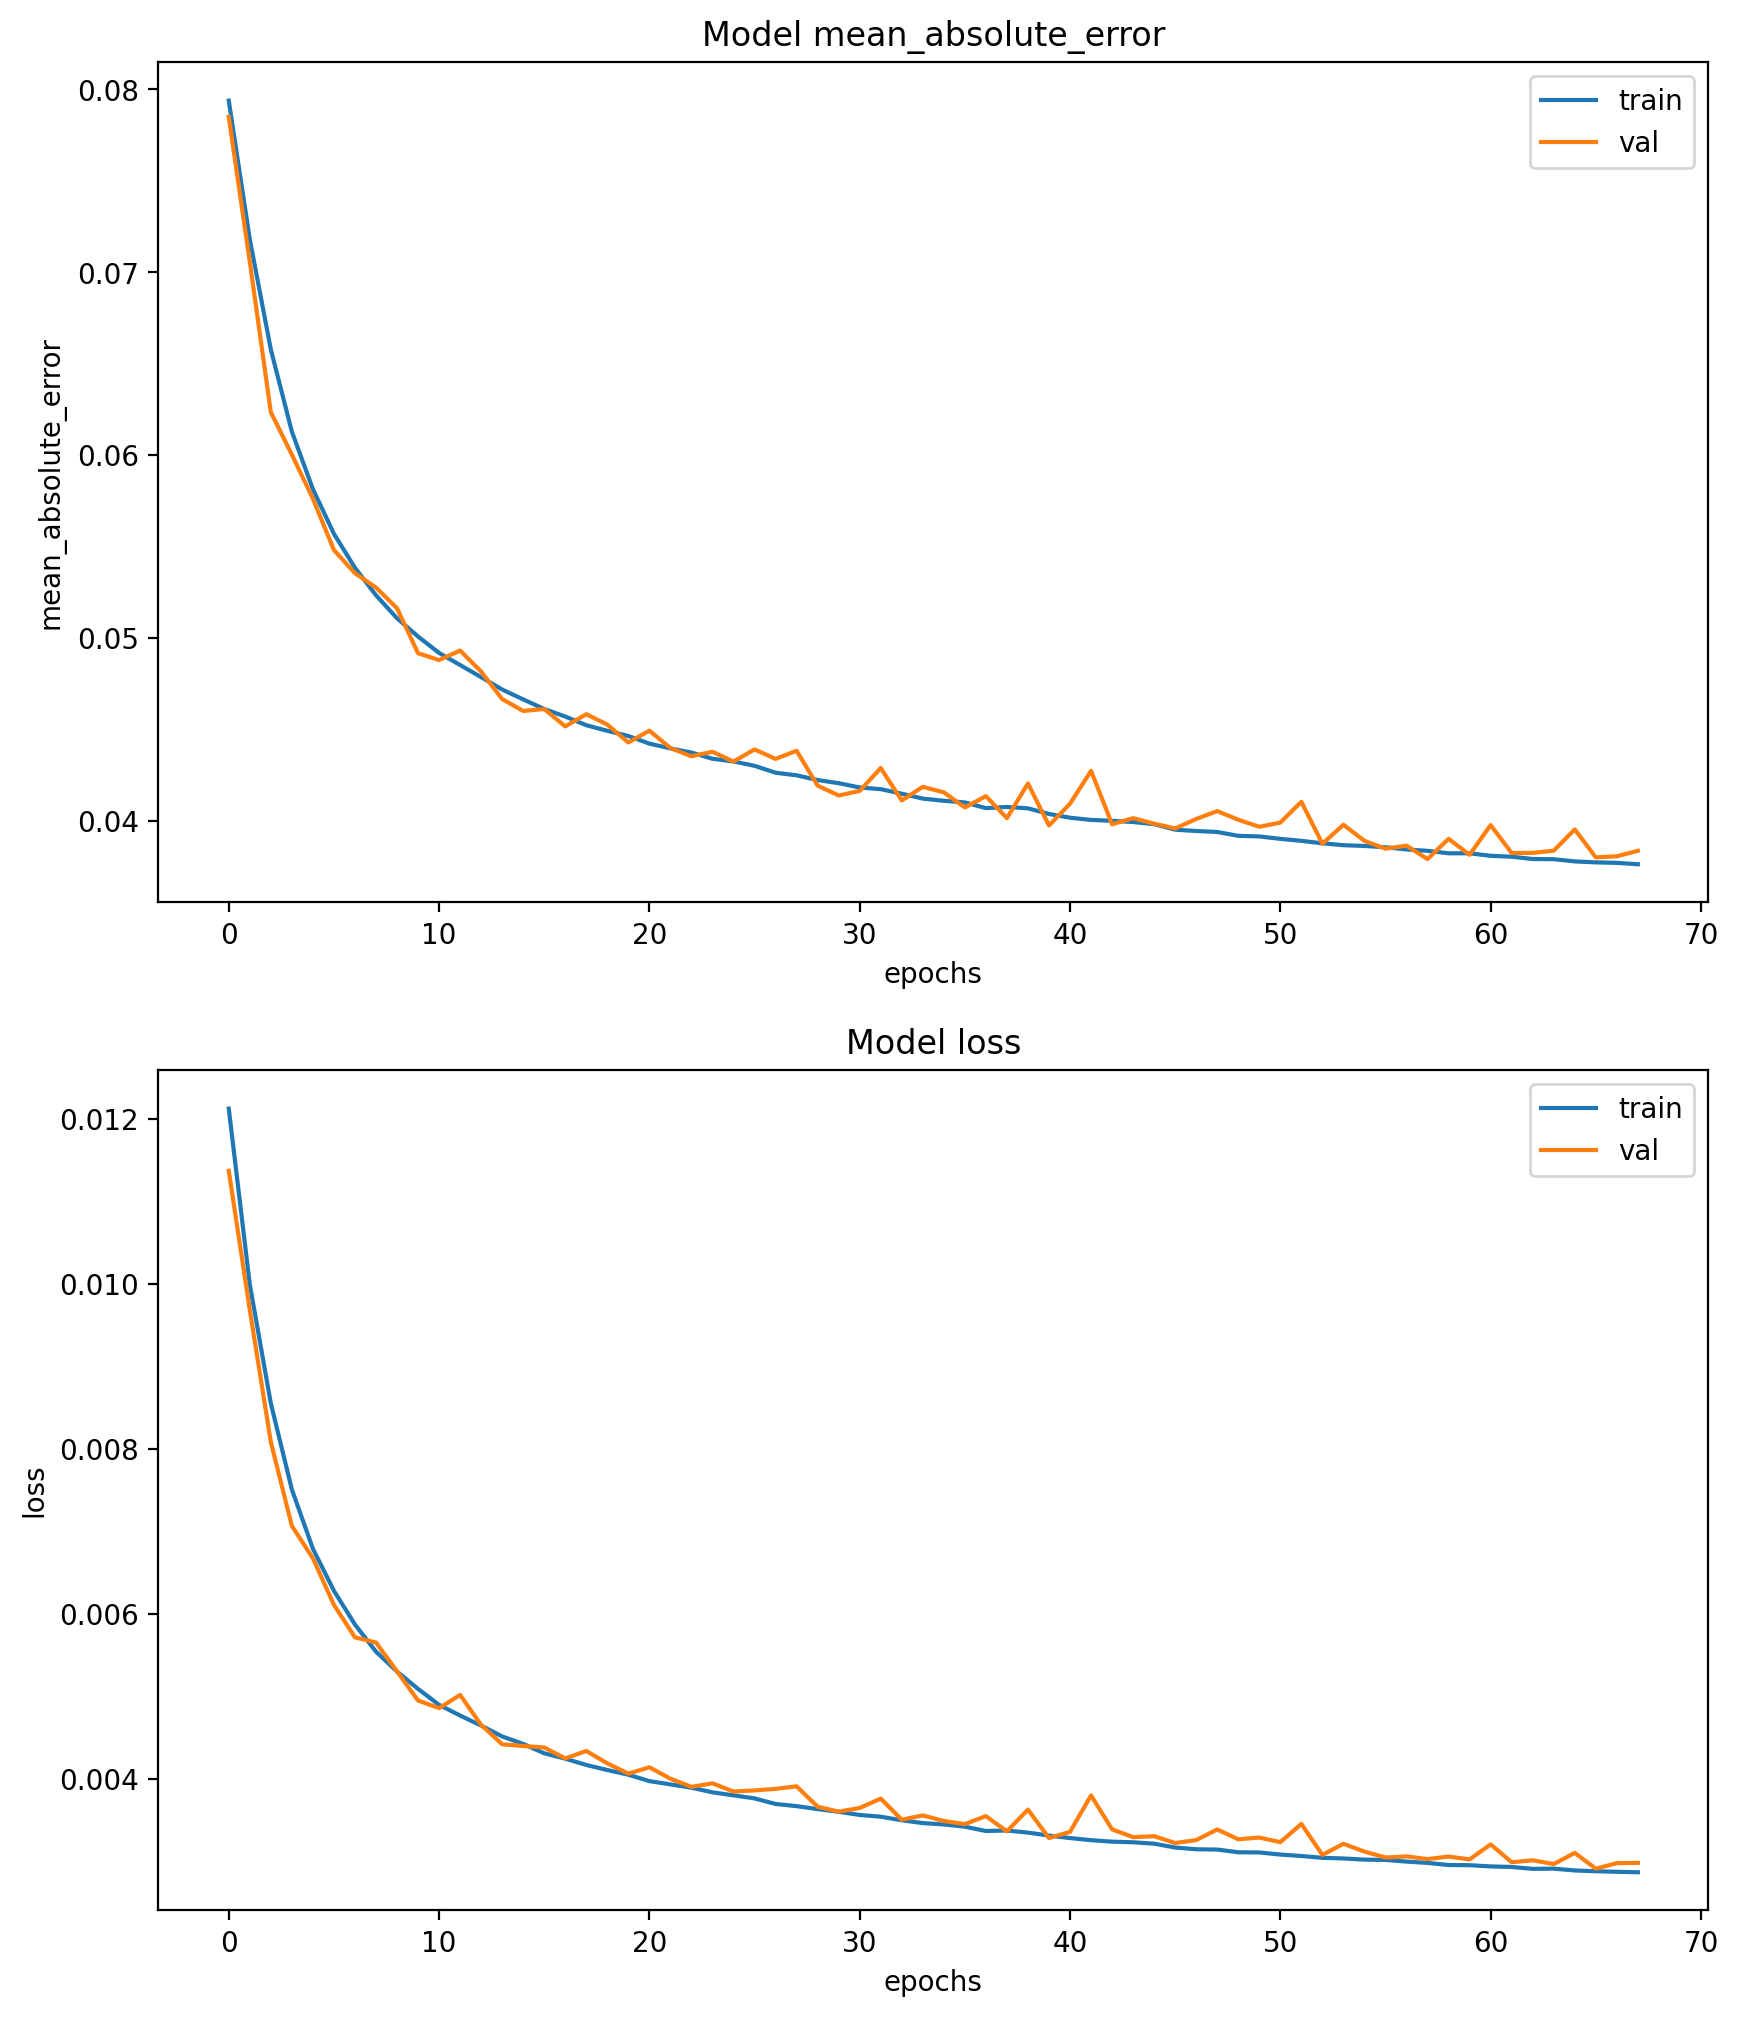

In [ ]:
# 그래프 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax = ax.ravel()

for i, met in enumerate(['mean_absolute_error', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

### 3.2.3 모델 평가 및 예측

In [ ]:
# ModelCheckpoint 콜백에 의해 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model("models/best_model_filtered.keras")

In [ ]:
# 모델 평가
loss, mae = loaded_model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

2724/2724 [==============================] - 4s 2ms/step - loss: 0.0029 - mean_absolute_error: 0.0380
Test Mean Absolute Error: 0.038035087287425995


In [ ]:
# 예측 수행
y_pred = loaded_model.predict(X_test)

# 예측값을 원래 스케일로 되돌리기
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# 예측 결과 확인 (예: 첫 5개 예측 결과)
print("Predictions:", y_pred_rescaled[:10])
print("True Values:", scaler_y.inverse_transform(y_test[:10]))

2724/2724 [==============================] - 6s 2ms/step
Predictions: [[130093.695]
 [ 32358.139]
 [ 45589.617]
 [ 74659.87 ]
 [ 58519.418]
 [ 46746.992]
 [ 28817.307]
 [ 57087.035]
 [ 55935.453]
 [ 40861.67 ]]
True Values: [[132000.]
 [ 38500.]
 [ 46000.]
 [ 76000.]
 [ 47700.]
 [ 39300.]
 [ 24500.]
 [ 20000.]
 [ 57300.]
 [ 45000.]]


## 3.3 왜도 문제 해결 모델 훈련 및 검증

### 3.3.1 왜도 문제 해결 모델의 데이터 준비 및 전처리
- 왜도 문제 해결 후 정규화

#### 3.3.1.1 범주형 데이터 인코딩

In [ ]:
# 수치형 데이터 컬럼, 범주형 데이터 컬럼 구분
categorical_columns = ['city', 'dong', 'transaction_date']
numeric_columns = ['apartment_id', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor', 'transaction_real_price']

In [ ]:
# 범주형 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
le = LabelEncoder()

# 각 범주형 컬럼에 대해 인코딩하여 새로운 컬럼으로 추가
for column in categorical_columns:
    train_df[column + '_Encoded'] = le.fit_transform(train_df[column])

train_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,1,257,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1,437,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1,437,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,1,68,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,1,68,5


#### 3.3.1.2 인코딩 후 필요 없는 컬럼 제거

In [ ]:
# 필요 없는 컬럼 제거
train_df = train_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)

In [ ]:
# 컬럼 제거 확인
train_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,37500,1,257,5
1,5399,99.1700,1973,200801,6,20000,1,437,1
2,3578,84.7400,2007,200801,6,38500,1,437,1
3,10957,146.3900,2003,200801,15,118000,1,68,0
4,10639,194.4300,2004,200801,3,120000,1,68,5
...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0
1216549,9578,84.9923,2012,201711,7,30750,0,382,4
1216550,9578,84.9923,2012,201711,9,29500,0,382,4
1216551,9586,101.7400,2008,201711,7,26700,0,382,4


#### 3.3.1.3 왜도 문제 해결

In [ ]:
# 컬럼별 왜도 값 출력
for col in train_df.columns:
  print(col, ":", train_df[col].skew())

apartment_id : 0.07393505038632027
exclusive_use_area : 1.2275090586886344
year_of_completion : -0.47042269049113083
transaction_year_month : -0.26754786933022917
floor : 1.3247097550477565
transaction_real_price : 3.4071692420405535
city_Encoded : -0.4517161558098492
dong_Encoded : -0.03324782699868603
transaction_date_Encoded : 0.6620302354567463


In [ ]:
# 왜도 값이 -1 이하 또는 1 이상인 컬럼만 출력
for col in train_df.columns:
  if train_df[col].skew() <= -1 or train_df[col].skew() >= 1:
    print(col, ":", train_df[col].skew())

exclusive_use_area : 1.2275090586886344
floor : 1.3247097550477565
transaction_real_price : 3.4071692420405535


In [ ]:
# floor의 경우 음수 값을 가지므로 일단 제외하고 전용면적, 실거래가 두 컬럼에 대해서만 로그 변환 적용
log_columns = ['exclusive_use_area', 'transaction_real_price']

In [ ]:
# 로그 변환해 새로운 컬럼으로 추가
for col in log_columns:
  train_df[col + '_log'] = np.log1p(train_df[col])

In [ ]:
# 컬럼 추가 잘못한 경우 필요한 컬럼 삭제
# train_df = train_df.drop(['exclusive_use_area_log', 'floor_log', 'transaction_real_price_log'], axis=1)
# train_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,37500,1,257,5
1,5399,99.1700,1973,200801,6,20000,1,437,1
2,3578,84.7400,2007,200801,6,38500,1,437,1
3,10957,146.3900,2003,200801,15,118000,1,68,0
4,10639,194.4300,2004,200801,3,120000,1,68,5
...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0
1216549,9578,84.9923,2012,201711,7,30750,0,382,4
1216550,9578,84.9923,2012,201711,9,29500,0,382,4
1216551,9586,101.7400,2008,201711,7,26700,0,382,4


In [ ]:
# 로그 변환 컬럼 추가된 것 확인
train_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,84.8200,2002,200801,2,37500,1,257,5,4.452252,10.532123
1,5399,99.1700,1973,200801,6,20000,1,437,1,4.606869,9.903538
2,3578,84.7400,2007,200801,6,38500,1,437,1,4.451319,10.558439
3,10957,146.3900,2003,200801,15,118000,1,68,0,4.993082,11.678448
4,10639,194.4300,2004,200801,3,120000,1,68,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0,4.107993,9.998843
1216549,9578,84.9923,2012,201711,7,30750,0,382,4,4.454258,10.333678
1216550,9578,84.9923,2012,201711,9,29500,0,382,4,4.454258,10.292179
1216551,9586,101.7400,2008,201711,7,26700,0,382,4,4.632202,10.192456


In [ ]:
# 로그 변환된 원래 컬럼 제거
train_df = train_df.drop(log_columns, axis=1)

In [ ]:
# 컬럼 제거 확인
train_df

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,2002,200801,2,1,257,5,4.452252,10.532123
1,5399,1973,200801,6,1,437,1,4.606869,9.903538
2,3578,2007,200801,6,1,437,1,4.451319,10.558439
3,10957,2003,200801,15,1,68,0,4.993082,11.678448
4,10639,2004,200801,3,1,68,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...
1216548,9578,2012,201711,3,0,382,0,4.107993,9.998843
1216549,9578,2012,201711,7,0,382,4,4.454258,10.333678
1216550,9578,2012,201711,9,0,382,4,4.454258,10.292179
1216551,9586,2008,201711,7,0,382,4,4.632202,10.192456


In [ ]:
# (로그 변환 후) 컬럼별 왜도 값 출력
for col in train_df.columns:
  print(col, ":", train_df[col].skew())

apartment_id : 0.07393505038632027
year_of_completion : -0.47042269049113083
transaction_year_month : -0.26754786933022917
floor : 1.3247097550477565
city_Encoded : -0.4517161558098492
dong_Encoded : -0.03324782699868603
transaction_date_Encoded : 0.6620302354567463
exclusive_use_area_log : -0.4381557402881139
transaction_real_price_log : -0.09493151731286435


In [ ]:
# (로그 변환 후) 왜도 값이 -1 이하 또는 1 이상인 컬럼만 출력
for col in train_df.columns:
  if train_df[col].skew() <= -1 or train_df[col].skew() >= 1:
    print(col, ":", train_df[col].skew())

floor : 1.3247097550477565


#### 3.3.1.4 로그 변환 후 Heatmap 재작성

In [ ]:
# Heatmap 작성을 위한 상관관계 매트릭스 생성
correlation_matrix = train_df.corr()

<Axes: >

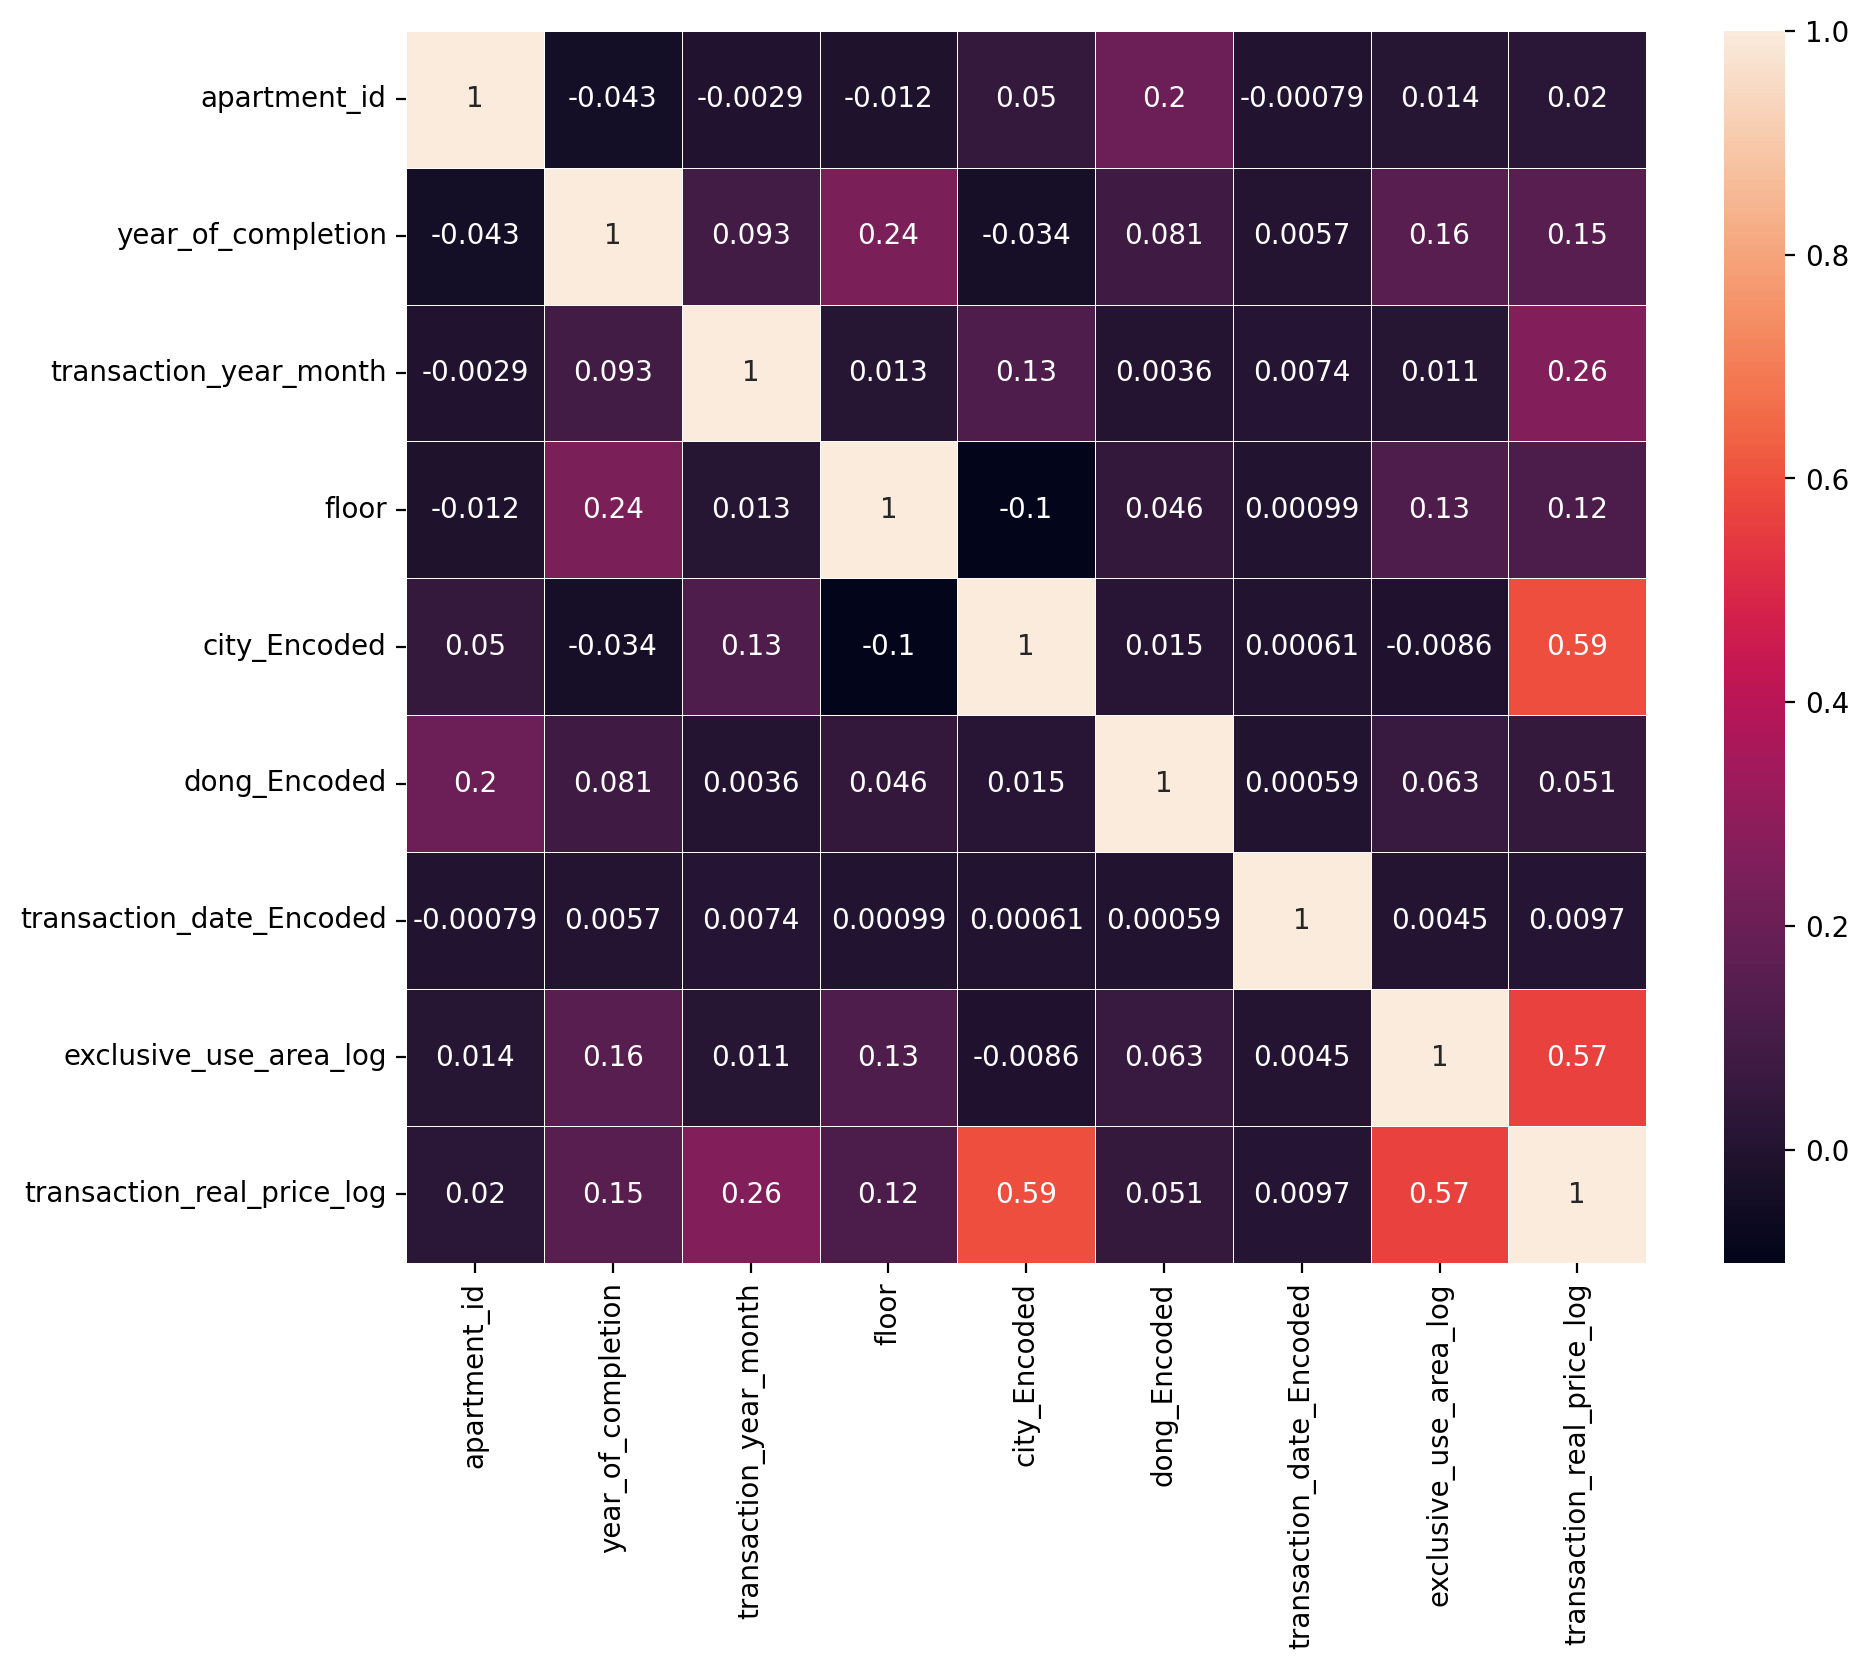

In [ ]:
# Heatmap 그래프 그리기 ==> 왜도 문제 해결하고 났더니 히트맵에서 상관관계 컬럼이 달라짐!!
fig = plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, linewidths=.2, annot=True)

#### 3.3.1.5 데이터 전처리

In [ ]:
# 특성(X)과 타겟(y) 분리
X = train_df.drop(columns=['transaction_real_price_log'])
y = train_df['transaction_real_price_log']

In [ ]:
X

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log
0,7622,2002,200801,2,1,257,5,4.452252
1,5399,1973,200801,6,1,437,1,4.606869
2,3578,2007,200801,6,1,437,1,4.451319
3,10957,2003,200801,15,1,68,0,4.993082
4,10639,2004,200801,3,1,68,5,5.275202
...,...,...,...,...,...,...,...,...
1216548,9578,2012,201711,3,0,382,0,4.107993
1216549,9578,2012,201711,7,0,382,4,4.454258
1216550,9578,2012,201711,9,0,382,4,4.454258
1216551,9586,2008,201711,7,0,382,4,4.632202


In [ ]:
y

0          10.532123
1           9.903538
2          10.558439
3          11.678448
4          11.695255
             ...    
1216548     9.998843
1216549    10.333678
1216550    10.292179
1216551    10.192456
1216552    10.268165
Name: transaction_real_price_log, Length: 1216553, dtype: float64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   apartment_id              1216553 non-null  int64  
 1   year_of_completion        1216553 non-null  int64  
 2   transaction_year_month    1216553 non-null  int64  
 3   floor                     1216553 non-null  int64  
 4   city_Encoded              1216553 non-null  int64  
 5   dong_Encoded              1216553 non-null  int64  
 6   transaction_date_Encoded  1216553 non-null  int64  
 7   exclusive_use_area_log    1216553 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 74.3 MB


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 특성 스케일링
scaler_X = StandardScaler()
X_train = pd.DataFrame(scaler_X.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler_X.transform(X_test), columns=X_test.columns)

# 타겟 스케일링
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

In [ ]:
X_train

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log
0,0.924525,0.749423,-0.665573,-0.505651,0.799610,1.138313,-0.932685,1.208493
1,0.984594,-1.375498,-1.701585,-0.051317,-1.250609,0.554647,1.081624,-0.153760
2,-1.600600,-0.257118,-1.016647,1.463127,-1.250609,-1.612212,1.585202,-0.534033
3,-0.314289,0.637585,-1.343627,0.554460,-1.250609,-1.313083,-0.429108,0.398996
4,-1.006059,0.749423,0.711188,0.100127,-1.250609,-0.984771,-0.932685,-0.001237
...,...,...,...,...,...,...,...,...
973237,0.721688,0.973099,-0.669015,-0.051317,0.799610,1.554175,-0.429108,1.212712
973238,-1.195205,0.302072,1.041610,-1.111428,0.799610,-1.137984,-0.932685,1.268798
973239,0.922849,0.190234,1.065703,0.251571,0.799610,1.138313,-0.429108,-0.533142
973240,-0.931182,-1.039984,0.009040,-0.808539,-1.250609,-0.787784,-0.932685,-0.430851


In [ ]:
X_test

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log
0,0.603506,-2.605716,1.399568,-0.808539,0.799610,0.722451,1.585202,-1.045979
1,-1.512034,-0.033442,0.036575,-0.051317,0.799610,0.634901,-0.932685,-0.534924
2,-0.703479,1.755965,1.062262,-1.262873,0.799610,0.977805,-0.429108,0.613246
3,-0.257573,-2.382040,-1.687817,-0.657095,0.799610,-0.153048,-0.429108,-1.284886
4,0.273826,-1.263660,0.711188,-0.808539,0.799610,-0.999363,1.585202,-0.842834
...,...,...,...,...,...,...,...,...
243306,-0.108938,-0.257118,-0.672456,-0.354206,-1.250609,-1.101505,-0.429108,-0.541172
243307,-1.017514,-0.816308,-0.321383,0.705905,-1.250609,0.810001,-0.932685,2.160162
243308,0.982918,-1.711012,-1.357395,-0.808539,0.799610,-0.014427,-0.429108,-0.310026
243309,-1.612334,-0.704470,0.353230,1.311682,-1.250609,1.539583,-0.932685,0.400715


In [ ]:
y_train

array([[0.66989204],
       [0.56610637],
       [0.47882276],
       ...,
       [0.61789365],
       [0.48707524],
       [0.64343886]])

In [ ]:
y_test

array([[0.63615776],
       [0.63325345],
       [0.75639078],
       ...,
       [0.6946799 ],
       [0.59289493],
       [0.80481999]])

### 3.3.2 모델 정의, 컴파일, 훈련

In [ ]:
import tensorflow as tf

# 신경망 모델 정의
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  # tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 정의, 컴파일을 진행해 주세요.
# import tensorflow as tf

# with tf.device('/GPU:0'):
#   # 신경망 모델 정의
#   model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(64, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32, activation='relu'),
#     # tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(1)  # 출력층 (회귀 문제이므로 활성화 함수 없음)
#   ])

#   # 모델 컴파일
#   model.compile(optimizer='adam',
#                 loss='mean_squared_error',
#                 metrics=['mean_absolute_error'])

In [ ]:
# 텐서보드용 로그 절대 경로 생성
import os

# 현재 작업 디렉토리 출력
# cwd = os.getcwd()
# print("Current working directory:", cwd)

# 예: 작업 디렉토리를 변경
# cwd = os.chdir("/path/to/your/directory")

# cwd = cwd.replace('\\', '/')	# 윈도우에서 필요
# tensorboard_log_dir = cwd + '/logs/fit/'
# tensorboard_log_dir

# aiffel_home_dir = os.getenv('Aiffel_Home')		# 윈도우 환경에서 '사용자 환경변수'로 아예 추가해 둠. (단축키:Win+PauseBreak)
# aiffel_home_dir = aiffel_home_dir.replace("\\", "/")		# 디렉토리 경로 문자열이 이스케이프 처리된 것을 일반 문자열로 변환.
# tensorboard_log_dir = aiffel_home_dir + "/Official_Course/Datathon/"
# tensorboard_log_dir

'C:/Users/freen/OneDrive - 이우고등학교/프로그래밍 코드 모음/파이썬/아이펠 온라인8기 코어과정/AIFFEL_8th_Core_freentour/Official_Course/Datathon/'

In [ ]:
import datetime

# 텐서보드용 로그 위치 지정 (절대경로여야 함)
# log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# callback  리스트
callbacks_list = [
  tf.keras.callbacks.EarlyStopping(
    monitor="val_mean_absolute_error",
    patience=10,
  ),
  tf.keras.callbacks.ModelCheckpoint(
    filepath="models/best_model_skewness.keras",
    monitor="val_loss",
    save_best_only=True,
    # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
    # save_format='h5'
  ),
  # tf.keras.callbacks.TensorBoard(
  #   log_dir = log_dir,
  # )
]

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=callbacks_list)

Epoch 1/100
12166/12166 [==============================] - 36s 3ms/step - loss: 0.0014 - mean_absolute_error: 0.0269 - val_loss: 9.2234e-04 - val_mean_absolute_error: 0.0232
Epoch 2/100
12166/12166 [==============================] - 33s 3ms/step - loss: 8.6898e-04 - mean_absolute_error: 0.0224 - val_loss: 7.9749e-04 - val_mean_absolute_error: 0.0214
Epoch 3/100
12166/12166 [==============================] - 35s 3ms/step - loss: 7.5079e-04 - mean_absolute_error: 0.0206 - val_loss: 7.3104e-04 - val_mean_absolute_error: 0.0204
Epoch 4/100
12166/12166 [==============================] - 33s 3ms/step - loss: 6.8442e-04 - mean_absolute_error: 0.0195 - val_loss: 6.5770e-04 - val_mean_absolute_error: 0.0190
Epoch 5/100
12166/12166 [==============================] - 33s 3ms/step - loss: 6.4082e-04 - mean_absolute_error: 0.0188 - val_loss: 6.2401e-04 - val_mean_absolute_error: 0.0186
Epoch 6/100
12166/12166 [==============================] - 32s 3ms/step - loss: 6.0739e-04 - mean_absolute_error: 

In [ ]:
# LMS에서는 다음 코드를 사용해 모델 훈련을 진행해 주세요.
# import datetime

# with tf.device('/GPU:0'):
#   # 텐서보드용 로그 위치 지정 (절대경로여야 함)
#   # log_dir = '/Tensorboard/logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#   # callback  리스트
#   callbacks_list = [
#     tf.keras.callbacks.EarlyStopping(
#       monitor="val_mean_absolute_error",
#       patience=10,
#     ),
#     tf.keras.callbacks.ModelCheckpoint(
#       filepath="models/best_model_baseline.keras",
#       monitor="val_loss",
#       save_best_only=True,
#       # .h5 형식으로 저장 (Keras 2.11 버전에서 ModelCheckpoint 콜백의 save_format 매개변수가 기본적으로 .keras 형식으로 변경)
#       # save_format='h5'
#     ),
#     # tf.keras.callbacks.TensorBoard(
#     #   log_dir = log_dir,
#     # )
#   ]

#   # 모델 훈련
#   history = model.fit(X_train, y_train,
#                       epochs=100,
#                       batch_size=32,
#                       validation_split=0.2,
#                       callbacks=callbacks_list)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               1152      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11521 (45.00 KB)
Trainable params: 11521 (45.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 구조 시각화
# EarlyStopping 콜백 적용한 경우에는 FileNotFoundError 발생함!
# from tensorflow.keras.utils import plot_model

# plot_model(model, show_shapes=True, to_file='apartment_baseline_model.png')

In [ ]:
# history 객체의 key 이름 확인
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

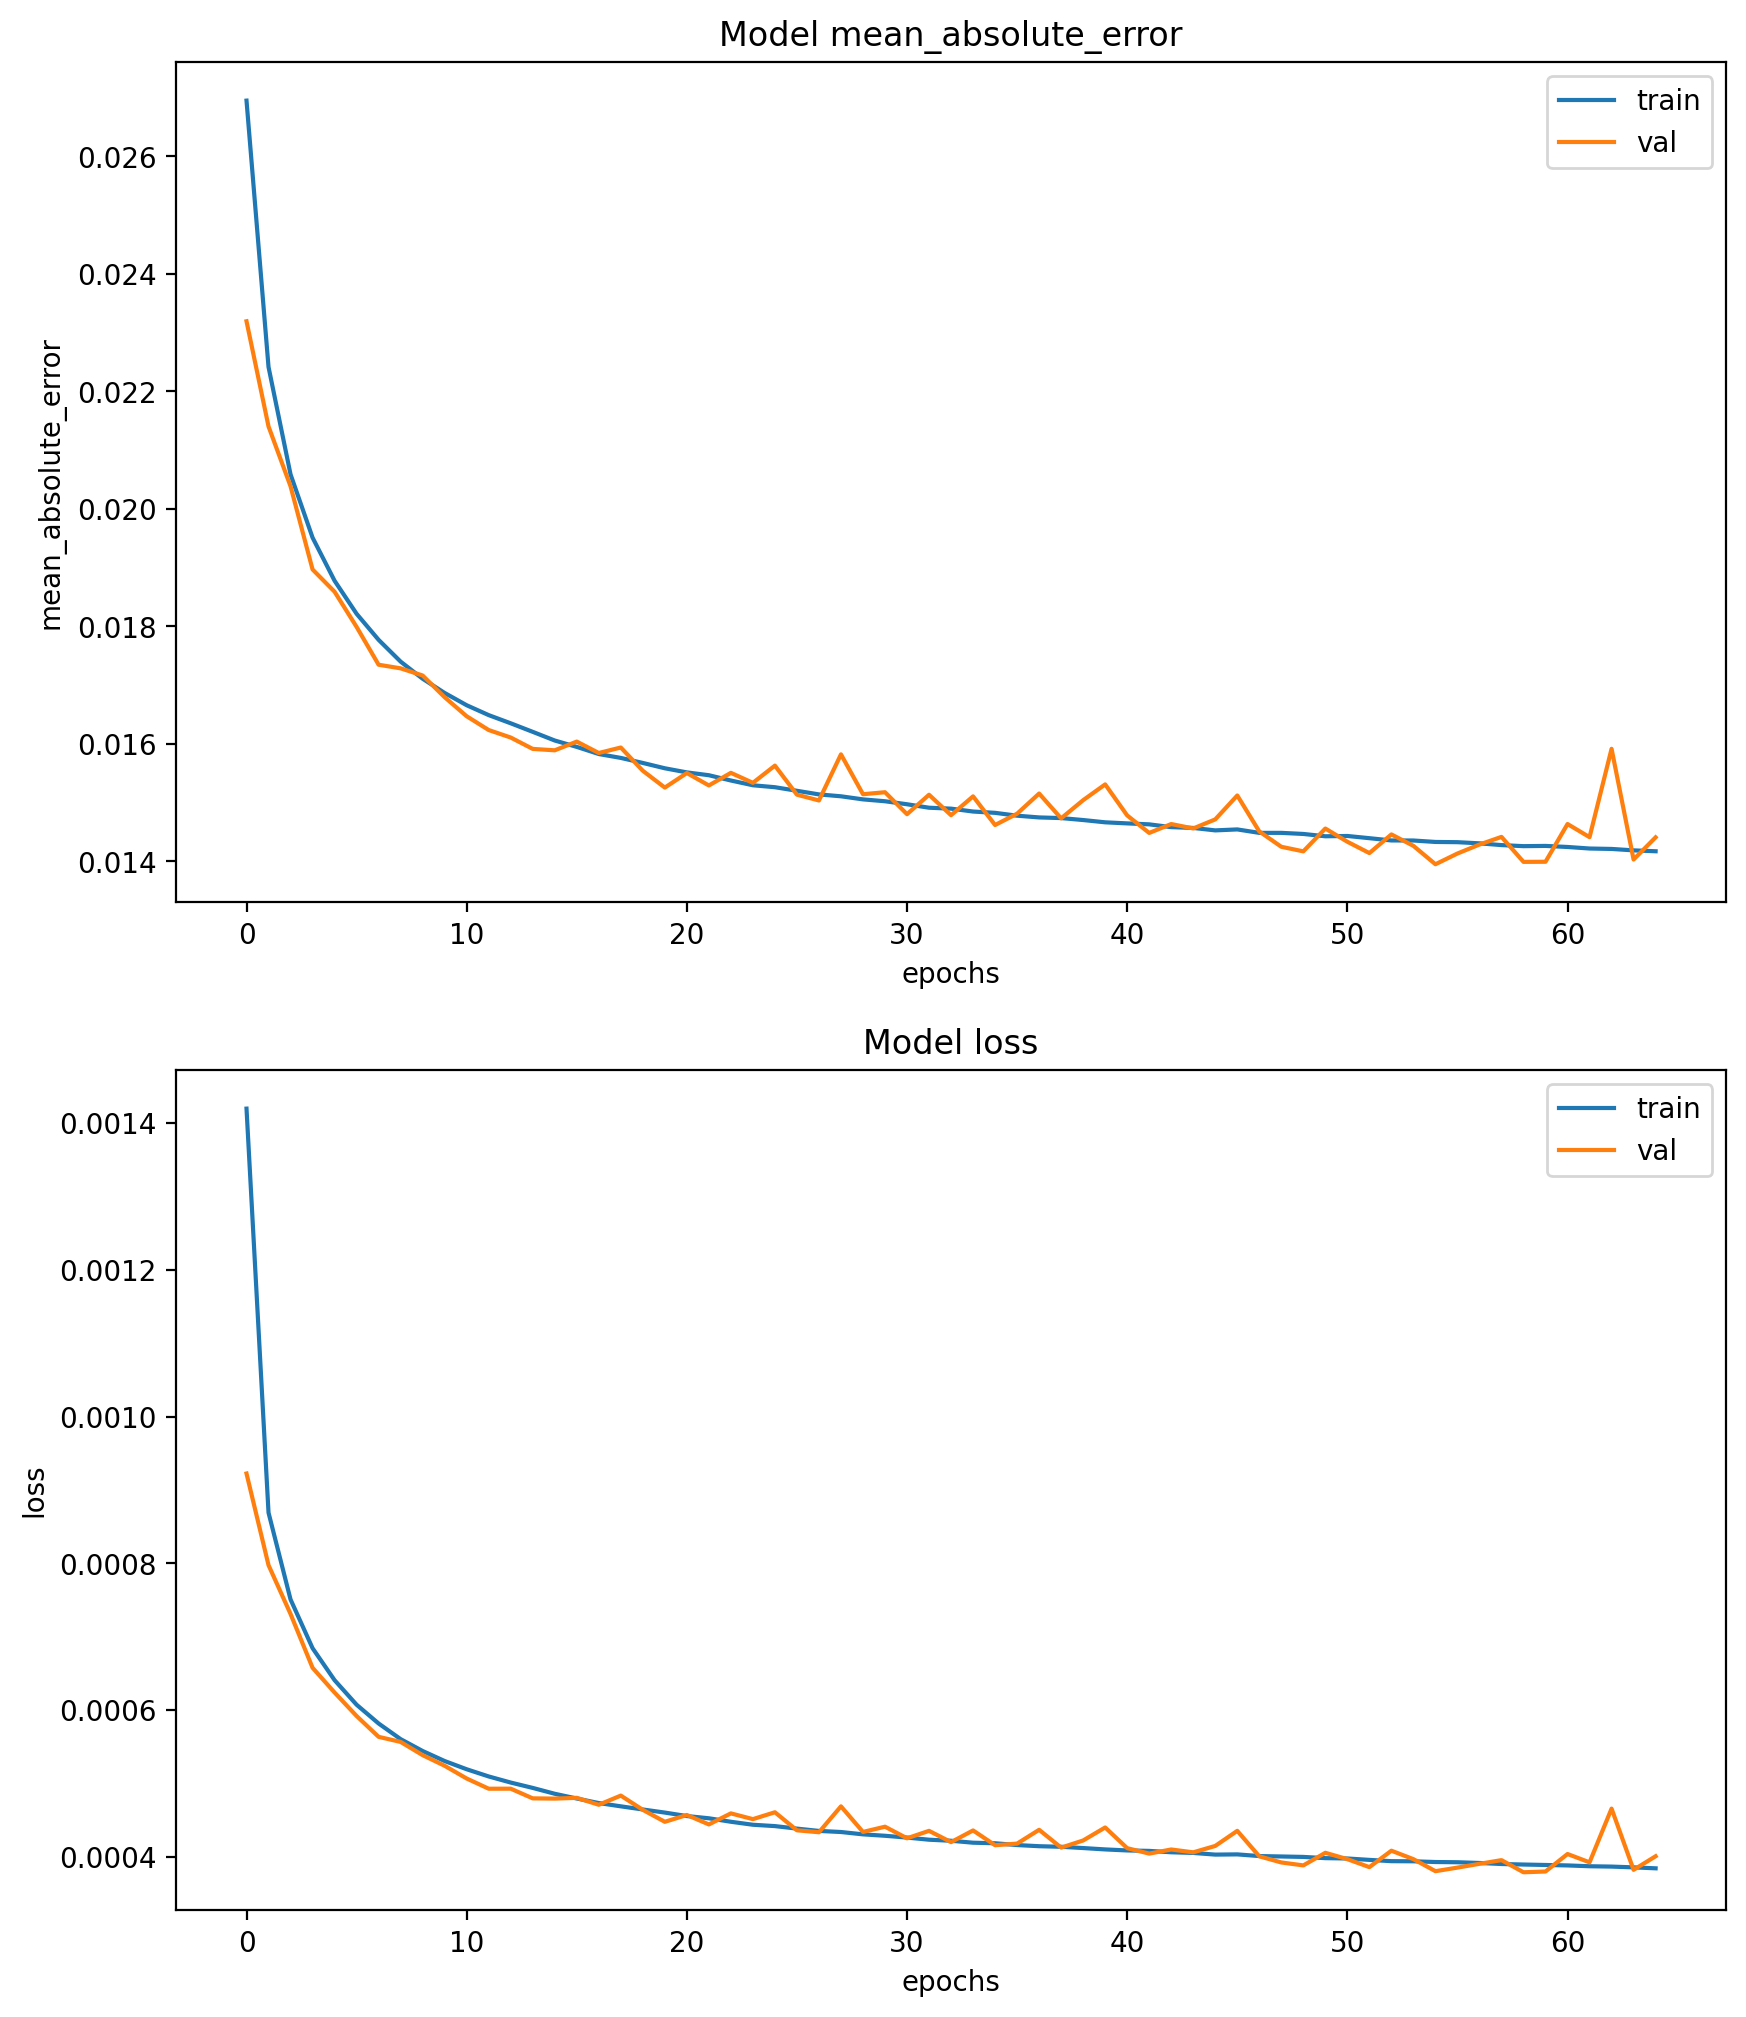

In [ ]:
# 그래프 그리기
fig, ax = plt.subplots(2, 1, figsize=(10, 12))
ax = ax.ravel()

for i, met in enumerate(['mean_absolute_error', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

### 3.3.3 모델 평가 및 예측

In [ ]:
# ModelCheckpoint 콜백에 의해 저장된 모델 불러오기
loaded_model = tf.keras.models.load_model("models/best_model_skewness.keras")

In [ ]:
# 모델 평가
loss, mae = loaded_model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {mae}')

7604/7604 [==============================] - 13s 2ms/step - loss: 3.7885e-04 - mean_absolute_error: 0.0140
Test Mean Absolute Error: 0.013960850425064564


In [ ]:
# 예측 수행
y_pred = loaded_model.predict(X_test)

# 예측값을 원래 스케일로 되돌리기
y_pred_rescaled = scaler_y.inverse_transform(y_pred)

# 스케일 역변환된 값에 로그 역변환 적용하기 (로그의 역변환은 지수 변환)
y_pred_rescaled = np.expm1(y_pred_rescaled)

# 예측 결과 확인 (예: 첫 10개 예측 결과)
print("Predictions:", y_pred_rescaled[:10])
print("True Values:", np.expm1(scaler_y.inverse_transform(y_test[:10])))

7604/7604 [==============================] - 14s 2ms/step
Predictions: [[21070.105]
 [33698.574]
 [94810.8  ]
 [21981.963]
 [21145.959]
 [47120.594]
 [32188.035]
 [50753.516]
 [45140.914]
 [46741.72 ]]
True Values: [[31000.]
 [30200.]
 [91500.]
 [23000.]
 [22000.]
 [41200.]
 [32900.]
 [40000.]
 [36550.]
 [35500.]]


# STEP 4. 최종 모델 평가

## 4.1 최종 모델 평가 및 예측
- 베이스라인 모델과 필터링 모델 두 개를 대상으로 필터링 타겟 데이터셋에 대해 각각 evaluate 돌려보고 결과 확인하기
- 베이스라인 모델과 왜도 해결 모델 두 개를 대상으로 필터링되지 않는 전체 데이터셋에 대해 각각 evaluate 돌려보고 결과 확인하기

### 4.1.1 최종 평가용 데이터셋 복사하기

In [ ]:
train_baseline_df = origin_train_df.copy()
train_skewness_df = origin_train_df.copy()

# 서울 거주 중산층을 타겟으로 한 데이터셋 분리 (전용면적 20~60평, 실거래액 1억~20억)
train_seoul_normal_normal_df = pd.merge(train_seoul_area_normal_df, train_seoul_price_normal_df)
train_seoul_normal_normal_skewness_df = pd.merge(train_seoul_area_normal_df, train_seoul_price_normal_df)

In [ ]:
train_baseline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:
train_skewness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:
train_seoul_normal_normal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435739 entries, 0 to 435738
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          435739 non-null  int64  
 1   apartment_id            435739 non-null  int64  
 2   city                    435739 non-null  object 
 3   dong                    435739 non-null  object 
 4   jibun                   435739 non-null  object 
 5   apt                     435739 non-null  object 
 6   addr_kr                 435739 non-null  object 
 7   exclusive_use_area      435739 non-null  float64
 8   year_of_completion      435739 non-null  int64  
 9   transaction_year_month  435739 non-null  int64  
 10  transaction_date        435739 non-null  object 
 11  floor                   435739 non-null  int64  
 12  transaction_real_price  435739 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 43.2+ MB


In [ ]:
train_seoul_normal_normal_skewness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435739 entries, 0 to 435738
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          435739 non-null  int64  
 1   apartment_id            435739 non-null  int64  
 2   city                    435739 non-null  object 
 3   dong                    435739 non-null  object 
 4   jibun                   435739 non-null  object 
 5   apt                     435739 non-null  object 
 6   addr_kr                 435739 non-null  object 
 7   exclusive_use_area      435739 non-null  float64
 8   year_of_completion      435739 non-null  int64  
 9   transaction_year_month  435739 non-null  int64  
 10  transaction_date        435739 non-null  object 
 11  floor                   435739 non-null  int64  
 12  transaction_real_price  435739 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 43.2+ MB


### 4.1.2 범주형 데이터 인코딩

In [ ]:
# 수치형 데이터 컬럼, 범주형 데이터 컬럼 구분
categorical_columns = ['city', 'dong', 'transaction_date']
numeric_columns = ['apartment_id', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month', 'floor', 'transaction_real_price']

In [ ]:
# 범주형 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 초기화
le = LabelEncoder()

# 각 범주형 컬럼에 대해 인코딩하여 새로운 컬럼으로 추가
for column in categorical_columns:
    train_baseline_df[column + '_Encoded'] = le.fit_transform(train_baseline_df[column])
    train_skewness_df[column + '_Encoded'] = le.fit_transform(train_skewness_df[column])
    train_seoul_normal_normal_df[column + '_Encoded'] = le.fit_transform(train_seoul_normal_normal_df[column])
    train_seoul_normal_normal_skewness_df[column + '_Encoded'] = le.fit_transform(train_seoul_normal_normal_skewness_df[column])

In [ ]:
train_baseline_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,1,257,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1,437,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1,437,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,1,68,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,1,68,5


In [ ]:
train_skewness_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,1,257,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1,437,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,1,437,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,1,68,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,1,68,5


In [ ]:
train_seoul_normal_normal_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,0,166,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,0,280,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,0,280,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,0,39,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,0,39,5


In [ ]:
train_seoul_normal_normal_skewness_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,0,166,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,0,280,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,0,280,1
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,0,39,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,0,39,5


### 4.1.3 인코딩 후 필요 없는 컬럼 제거

In [ ]:
# 필요 없는 컬럼 제거
train_baseline_df = train_baseline_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)
train_skewness_df = train_skewness_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)
train_seoul_normal_normal_df = train_seoul_normal_normal_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)
train_seoul_normal_normal_skewness_df = train_seoul_normal_normal_skewness_df.drop(['transaction_id', 'city', 'dong', 'apt', 'jibun', 'addr_kr', 'transaction_date'], axis=1)

In [ ]:
# 컬럼 제거 확인
train_baseline_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,37500,1,257,5
1,5399,99.1700,1973,200801,6,20000,1,437,1
2,3578,84.7400,2007,200801,6,38500,1,437,1
3,10957,146.3900,2003,200801,15,118000,1,68,0
4,10639,194.4300,2004,200801,3,120000,1,68,5
...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0
1216549,9578,84.9923,2012,201711,7,30750,0,382,4
1216550,9578,84.9923,2012,201711,9,29500,0,382,4
1216551,9586,101.7400,2008,201711,7,26700,0,382,4


In [ ]:
# 컬럼 제거 확인
train_skewness_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,37500,1,257,5
1,5399,99.1700,1973,200801,6,20000,1,437,1
2,3578,84.7400,2007,200801,6,38500,1,437,1
3,10957,146.3900,2003,200801,15,118000,1,68,0
4,10639,194.4300,2004,200801,3,120000,1,68,5
...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0
1216549,9578,84.9923,2012,201711,7,30750,0,382,4
1216550,9578,84.9923,2012,201711,9,29500,0,382,4
1216551,9586,101.7400,2008,201711,7,26700,0,382,4


In [ ]:
# 컬럼 제거 확인
train_seoul_normal_normal_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.82,2002,200801,2,37500,0,166,5
1,5399,99.17,1973,200801,6,20000,0,280,1
2,3578,84.74,2007,200801,6,38500,0,280,1
3,10957,146.39,2003,200801,15,118000,0,39,0
4,10639,194.43,2004,200801,3,120000,0,39,5
...,...,...,...,...,...,...,...,...,...
435734,686,84.53,2009,201711,4,56000,0,6,1
435735,684,84.53,2009,201711,10,57000,0,6,0
435736,682,84.74,2009,201711,3,56500,0,6,4
435737,680,84.74,2009,201711,9,55500,0,6,4


In [ ]:
# 컬럼 제거 확인
train_seoul_normal_normal_skewness_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.82,2002,200801,2,37500,0,166,5
1,5399,99.17,1973,200801,6,20000,0,280,1
2,3578,84.74,2007,200801,6,38500,0,280,1
3,10957,146.39,2003,200801,15,118000,0,39,0
4,10639,194.43,2004,200801,3,120000,0,39,5
...,...,...,...,...,...,...,...,...,...
435734,686,84.53,2009,201711,4,56000,0,6,1
435735,684,84.53,2009,201711,10,57000,0,6,0
435736,682,84.74,2009,201711,3,56500,0,6,4
435737,680,84.74,2009,201711,9,55500,0,6,4


### 4.1.4 왜도 문제 해결

In [ ]:
# floor의 경우 음수 값을 가지므로 일단 제외하고 전용면적, 실거래가 두 컬럼에 대해서만 로그 변환 적용
log_columns = ['exclusive_use_area', 'transaction_real_price']

In [ ]:
# 로그 변환해 새로운 컬럼으로 추가
for col in log_columns:
  train_skewness_df[col + '_log'] = np.log1p(train_skewness_df[col])
  train_seoul_normal_normal_skewness_df[col + '_log'] = np.log1p(train_seoul_normal_normal_skewness_df[col])

In [ ]:
# 로그 변환 컬럼 추가된 것 확인
train_skewness_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,84.8200,2002,200801,2,37500,1,257,5,4.452252,10.532123
1,5399,99.1700,1973,200801,6,20000,1,437,1,4.606869,9.903538
2,3578,84.7400,2007,200801,6,38500,1,437,1,4.451319,10.558439
3,10957,146.3900,2003,200801,15,118000,1,68,0,4.993082,11.678448
4,10639,194.4300,2004,200801,3,120000,1,68,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,22000,0,382,0,4.107993,9.998843
1216549,9578,84.9923,2012,201711,7,30750,0,382,4,4.454258,10.333678
1216550,9578,84.9923,2012,201711,9,29500,0,382,4,4.454258,10.292179
1216551,9586,101.7400,2008,201711,7,26700,0,382,4,4.632202,10.192456


In [ ]:
# 로그 변환 컬럼 추가된 것 확인
train_seoul_normal_normal_skewness_df

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,84.82,2002,200801,2,37500,0,166,5,4.452252,10.532123
1,5399,99.17,1973,200801,6,20000,0,280,1,4.606869,9.903538
2,3578,84.74,2007,200801,6,38500,0,280,1,4.451319,10.558439
3,10957,146.39,2003,200801,15,118000,0,39,0,4.993082,11.678448
4,10639,194.43,2004,200801,3,120000,0,39,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...,...,...
435734,686,84.53,2009,201711,4,56000,0,6,1,4.448867,10.933125
435735,684,84.53,2009,201711,10,57000,0,6,0,4.448867,10.950824
435736,682,84.74,2009,201711,3,56500,0,6,4,4.451319,10.942014
435737,680,84.74,2009,201711,9,55500,0,6,4,4.451319,10.924156


In [ ]:
# 로그 변환된 원래 컬럼 제거
train_skewness_df = train_skewness_df.drop(log_columns, axis=1)
train_seoul_normal_normal_skewness_df = train_seoul_normal_normal_skewness_df.drop(log_columns, axis=1)

In [ ]:
# 컬럼 제거 확인
train_skewness_df

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,2002,200801,2,1,257,5,4.452252,10.532123
1,5399,1973,200801,6,1,437,1,4.606869,9.903538
2,3578,2007,200801,6,1,437,1,4.451319,10.558439
3,10957,2003,200801,15,1,68,0,4.993082,11.678448
4,10639,2004,200801,3,1,68,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...
1216548,9578,2012,201711,3,0,382,0,4.107993,9.998843
1216549,9578,2012,201711,7,0,382,4,4.454258,10.333678
1216550,9578,2012,201711,9,0,382,4,4.454258,10.292179
1216551,9586,2008,201711,7,0,382,4,4.632202,10.192456


In [ ]:
# 컬럼 제거 확인
train_seoul_normal_normal_skewness_df

,apartment_id,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded,exclusive_use_area_log,transaction_real_price_log
0,7622,2002,200801,2,0,166,5,4.452252,10.532123
1,5399,1973,200801,6,0,280,1,4.606869,9.903538
2,3578,2007,200801,6,0,280,1,4.451319,10.558439
3,10957,2003,200801,15,0,39,0,4.993082,11.678448
4,10639,2004,200801,3,0,39,5,5.275202,11.695255
...,...,...,...,...,...,...,...,...,...
435734,686,2009,201711,4,0,6,1,4.448867,10.933125
435735,684,2009,201711,10,0,6,0,4.448867,10.950824
435736,682,2009,201711,3,0,6,4,4.451319,10.942014
435737,680,2009,201711,9,0,6,4,4.451319,10.924156


### 4.1.5 데이터 전처리

In [ ]:
# 특성(X)과 타겟(y) 분리
X_baseline = train_baseline_df.drop(columns=['transaction_real_price'])
y_baseline = train_baseline_df['transaction_real_price']
X_skewness = train_skewness_df.drop(columns=['transaction_real_price_log'])
y_skewness = train_skewness_df['transaction_real_price_log']
X_seoul_normal_normal = train_seoul_normal_normal_df.drop(columns=['transaction_real_price'])
y_seoul_normal_normal = train_seoul_normal_normal_df['transaction_real_price']
X_seoul_normal_normal_skewness = train_seoul_normal_normal_skewness_df.drop(columns=['transaction_real_price_log'])
y_seoul_normal_normal_skewness = train_seoul_normal_normal_skewness_df['transaction_real_price_log']

In [ ]:
X_baseline

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,7622,84.8200,2002,200801,2,1,257,5
1,5399,99.1700,1973,200801,6,1,437,1
2,3578,84.7400,2007,200801,6,1,437,1
3,10957,146.3900,2003,200801,15,1,68,0
4,10639,194.4300,2004,200801,3,1,68,5
...,...,...,...,...,...,...,...,...
1216548,9578,59.8245,2012,201711,3,0,382,0
1216549,9578,84.9923,2012,201711,7,0,382,4
1216550,9578,84.9923,2012,201711,9,0,382,4
1216551,9586,101.7400,2008,201711,7,0,382,4


In [ ]:
y_baseline

0           37500
1           20000
2           38500
3          118000
4          120000
            ...  
1216548     22000
1216549     30750
1216550     29500
1216551     26700
1216552     28800
Name: transaction_real_price, Length: 1216553, dtype: int64

In [ ]:
X_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 8 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   apartment_id              1216553 non-null  int64  
 1   exclusive_use_area        1216553 non-null  float64
 2   year_of_completion        1216553 non-null  int64  
 3   transaction_year_month    1216553 non-null  int64  
 4   floor                     1216553 non-null  int64  
 5   city_Encoded              1216553 non-null  int64  
 6   dong_Encoded              1216553 non-null  int64  
 7   transaction_date_Encoded  1216553 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 74.3 MB


In [ ]:
from sklearn.model_selection import train_test_split

# 데이터셋 분할 (훈련 세트와 테스트 세트)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)
X_train_skewness, X_test_skewness, y_train_skewness, y_test_skewness = train_test_split(X_skewness, y_skewness, test_size=0.2, random_state=42)
X_train_seoul_normal_normal, X_test_seoul_normal_normal, y_train_seoul_normal_normal, y_test_seoul_normal_normal = train_test_split(X_seoul_normal_normal, y_seoul_normal_normal, test_size=0.2, random_state=42)
X_train_seoul_normal_normal_skewness, X_test_seoul_normal_normal_skewness, y_train_seoul_normal_normal_skewness, y_test_seoul_normal_normal_skewness = train_test_split(X_seoul_normal_normal_skewness, y_seoul_normal_normal_skewness, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 특성 스케일링 : 각각 다른 스케일러 객체를 생성해서 사용해야 함!!
scaler_X_baseline = StandardScaler()
scaler_X_skewness = StandardScaler()
scaler_X_seoul_normal_normal = StandardScaler()
scaler_X_seoul_normal_normal_skewness = StandardScaler()
X_train_baseline = pd.DataFrame(scaler_X_baseline.fit_transform(X_train_baseline), columns=X_train_baseline.columns)
X_test_baseline = pd.DataFrame(scaler_X_baseline.transform(X_test_baseline), columns=X_test_baseline.columns)
X_train_skewness = pd.DataFrame(scaler_X_skewness.fit_transform(X_train_skewness), columns=X_train_skewness.columns)
X_test_skewness = pd.DataFrame(scaler_X_skewness.transform(X_test_skewness), columns=X_test_skewness.columns)
X_train_seoul_normal_normal = pd.DataFrame(scaler_X_seoul_normal_normal.fit_transform(X_train_seoul_normal_normal), columns=X_train_seoul_normal_normal.columns)
X_test_seoul_normal_normal = pd.DataFrame(scaler_X_seoul_normal_normal.transform(X_test_seoul_normal_normal), columns=X_test_seoul_normal_normal.columns)
X_train_seoul_normal_normal_skewness = pd.DataFrame(scaler_X_seoul_normal_normal_skewness.fit_transform(X_train_seoul_normal_normal_skewness), columns=X_train_seoul_normal_normal_skewness.columns)
X_test_seoul_normal_normal_skewness = pd.DataFrame(scaler_X_seoul_normal_normal_skewness.transform(X_test_seoul_normal_normal_skewness), columns=X_test_seoul_normal_normal_skewness.columns)

# 타겟 스케일링 : 각각 다른 스케일러 객체를 생성해서 사용해야 함!!
scaler_y_baseline = MinMaxScaler()
scaler_y_skewness = MinMaxScaler()
scaler_y_seoul_normal_normal = MinMaxScaler()
scaler_y_seoul_normal_normal_skewness = MinMaxScaler()
y_train_baseline = scaler_y_baseline.fit_transform(y_train_baseline.values.reshape(-1, 1))
y_test_baseline = scaler_y_baseline.transform(y_test_baseline.values.reshape(-1, 1))
y_train_skewness = scaler_y_skewness.fit_transform(y_train_skewness.values.reshape(-1, 1))
y_test_skewness = scaler_y_skewness.transform(y_test_skewness.values.reshape(-1, 1))
y_train_seoul_normal_normal = scaler_y_seoul_normal_normal.fit_transform(y_train_seoul_normal_normal.values.reshape(-1, 1))
y_test_seoul_normal_normal = scaler_y_seoul_normal_normal.transform(y_test_seoul_normal_normal.values.reshape(-1, 1))
y_train_seoul_normal_normal_skewness = scaler_y_seoul_normal_normal_skewness.fit_transform(y_train_seoul_normal_normal_skewness.values.reshape(-1, 1))
y_test_seoul_normal_normal_skewness = scaler_y_seoul_normal_normal_skewness.transform(y_test_seoul_normal_normal_skewness.values.reshape(-1, 1))

In [ ]:
X_train_baseline

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.924525,1.255593,0.749423,-0.665573,-0.505651,0.799610,1.138313,-0.932685
1,0.984594,-0.312023,-1.375498,-1.701585,-0.051317,-1.250609,0.554647,1.081624
2,-1.600600,-0.626439,-0.257118,-1.016647,1.463127,-1.250609,-1.612212,1.585202
3,-0.314289,0.231188,0.637585,-1.343627,0.554460,-1.250609,-1.313083,-0.429108
4,-1.006059,-0.173007,0.749423,0.711188,0.100127,-1.250609,-0.984771,-0.932685
...,...,...,...,...,...,...,...,...
973237,0.721688,1.261771,0.973099,-0.669015,-0.051317,0.799610,1.554175,-0.429108
973238,-1.195205,1.344837,0.302072,1.041610,-1.111428,0.799610,-1.137984,-0.932685
973239,0.922849,-0.625752,0.190234,1.065703,0.251571,0.799610,1.138313,-0.429108
973240,-0.931182,-0.545432,-1.039984,0.009040,-0.808539,-1.250609,-0.787784,-0.932685


In [ ]:
X_test_baseline

,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,city_Encoded,dong_Encoded,transaction_date_Encoded
0,0.603506,-0.985820,-2.605716,1.399568,-0.808539,0.799610,0.722451,1.585202
1,-1.512034,-0.627125,-0.033442,0.036575,-0.051317,0.799610,0.634901,-0.932685
2,-0.703479,0.473329,1.755965,1.062262,-1.262873,0.799610,0.977805,-0.429108
3,-0.257573,-1.131700,-2.382040,-1.687817,-0.657095,0.799610,-0.153048,-0.429108
4,0.273826,-0.851266,-1.263660,0.711188,-0.808539,0.799610,-0.999363,1.585202
...,...,...,...,...,...,...,...,...
243306,-0.108938,-0.631931,-0.257118,-0.672456,-0.354206,-1.250609,-1.101505,-0.429108
243307,-1.017514,2.923712,-0.816308,-0.321383,0.705905,-1.250609,0.810001,-0.932685
243308,0.982918,-0.446577,-1.711012,-1.357395,-0.808539,0.799610,-0.014427,-0.429108
243309,-1.612334,0.233056,-0.704470,0.353230,1.311682,-1.250609,1.539583,-0.932685


In [ ]:
y_train_baseline

array([[0.05110379],
       [0.02000244],
       [0.00904988],
       ...,
       [0.03195512],
       [0.00975729],
       [0.04024881]])

In [ ]:
y_test_baseline

array([[0.03768752],
       [0.03671179],
       [0.11147701],
       ...,
       [0.06391023],
       [0.02549091],
       [0.17246006]])

### 4.1.5 모델 간 평가 비교

In [ ]:
# Best Model 구글 드라이브 경로
# /content/drive/MyDrive/AIFFEL/best_model_baseline.keras
# /content/drive/MyDrive/AIFFEL/best_model_skewness.keras
# /content/drive/MyDrive/AIFFEL/best_model_filtered.keras
# /content/drive/MyDrive/AIFFEL/best_model_filtered_confirmed.keras

In [ ]:
# Best Model 불러오기
loaded_model_baseline = tf.keras.models.load_model("/content/drive/MyDrive/AIFFEL/best_model_baseline.keras")
loaded_model_skewness = tf.keras.models.load_model("/content/drive/MyDrive/AIFFEL/best_model_skewness.keras")
# loaded_model_seoul_normal_normal = tf.keras.models.load_model("/content/drive/MyDrive/AIFFEL/best_model_filtered.keras")
loaded_model_seoul_normal_normal = tf.keras.models.load_model("/content/drive/MyDrive/AIFFEL/best_model_filtered.keras")

In [ ]:
from sklearn.metrics import mean_absolute_error

# 예측 수행
y_pred_baseline = loaded_model_baseline.predict(X_test_baseline)
y_pred_skewness = loaded_model_skewness.predict(X_test_skewness)
y_pred_seoul_normal_normal = loaded_model_seoul_normal_normal.predict(X_test_seoul_normal_normal)

# 예측값을 원래 스케일로 되돌리기
y_pred_rescaled_baseline = scaler_y_baseline.inverse_transform(y_pred_baseline)
y_pred_rescaled_skewness = scaler_y_skewness.inverse_transform(y_pred_skewness)
y_pred_rescaled_seoul_normal_normal = scaler_y_seoul_normal_normal.inverse_transform(y_pred_seoul_normal_normal)
# 스케일 역변환된 값에 로그 역변환 적용하기 (로그의 역변환은 지수 변환)
y_pred_rescaled_skewness = np.expm1(y_pred_rescaled_skewness)

# 실제값도 원래 스케일로 되돌리기
y_test_rescaled_baseline = scaler_y_baseline.inverse_transform(y_test_baseline)
y_test_rescaled_skewness = scaler_y_skewness.inverse_transform(y_test_skewness)
y_test_rescaled_seoul_normal_normal = scaler_y_seoul_normal_normal.inverse_transform(y_test_seoul_normal_normal)
# 스케일 역변환된 값에 로그 역변환 적용하기 (로그의 역변환은 지수 변환)
y_test_rescaled_skewness = np.expm1(y_test_rescaled_skewness)

# 역변환된 예측값과 실제값을 비교하여 수동으로 MAE 계산
mae_baseline = mean_absolute_error(y_test_rescaled_baseline, y_pred_rescaled_baseline)
mae_skewness = mean_absolute_error(y_test_rescaled_skewness, y_pred_rescaled_skewness)
mae_seoul_normal_normal = mean_absolute_error(y_test_rescaled_seoul_normal_normal, y_pred_rescaled_seoul_normal_normal)

print("Baseline Model MAE:", mae_baseline)
print("Skewness Model MAE:", mae_skewness)
print("Seoul Normal Normal Model MAE:", mae_seoul_normal_normal)

2724/2724 [==============================] - 4s 1ms/step
Baseline Model MAE: 5530.538599402253
Skewness Model MAE: 4992.308610713143
Seoul Normal Normal Model MAE: 7226.6579997072795


# STEP 5. Summary
- 베이스라인 모델, 데이터셋 분리 모델, 왜도 문제 해결 모델 총 3개의 모델을 개발하고 성능을 비교함.
- 최종 MAE 값
  - 베이스라인 모델 : 5530.538599402253 (만원)
  - 데이터셋 분리 모델 : 7226.6579997072795 (만원)
  - 왜도 문제 해결 모델 : 4992.308610713143 (만원)
- 비교 결과 왜도 문제 해결 모델이 가장 낮은 MAE 값을 보여주었음.
- 서울 지역 중간 면적(20평 이상 60평 이하), 중간 실거래액(1억 이상 20억 이하)에 해당하는 것으로 데이터셋의 범위를 좁혀서 진행한 데이터셋 분리 모델 보다도 왜도 문제 해결 모델이 더 나은 성능을 보여준 것으로 볼 때, 데이터셋의 왜도 현상이 심한 경우 데이터셋의 범위를 한정하는 것 보다 데이터셋의 편중 상황을 해결하는 것이 모델의 성능을 향상시키는데에는 훨씬 더 도움이 된다는 것을 알게 되었음.
- 데이터셋 분리 모델이 전체 데이터셋을 기반으로 훈련한 베이스라인 모델 보다도 MAE 값이 더 높게 나온 것은 서울 지역의 실거래가 값의 범위가 더 넓고 데이터 편중 역시 더 크기 때문에 나타난 현상으로 보임.

# STEP 6. 회고
- 이한나  
  *  저에게 과분한 직함인 팀장으로서 부담이 되었지만, 워낙 에이스이신 두 팀원분들 (제민님, 주현님) 덕분에 많은 것을 배우고, 인사이트를 얻었던 값진 시간이었습니다. 부족한 저에게 많은 귀감과 자극을 주셔서 정말 감사합니다!
  *  데이터를 탐색하는 과정에서 히스토그램을 통해 train.csv 데이터의 주요 수치형 변수들의 분포를 분석하며 exclusive_use_area, floor, transaction_real_price 데이터에서 왜도(skewness) 현상이 일어나는 것을 확인하였고, 이를 줄이기 위한 변환이 필요하다는 것을 발견할 수 있었습니다.
  *  대용량 데이터를 분석하다 보니 모델을 훈련하는 과정에서 많은 시간이 소요되었고, Colab, LMS 등 각 분석 도구 툴의 한계와 성능을 경험하게 되었습니다. 이를 통해 데이터 분석의 중요성과 더불어 효율적인 분석 환경의 필요성을 다시금 깨닫게 되었습니다.


- 유제민
  - 아이펠에 들어와서 처음으로 진행한 팀 프로젝트였습니다. 기대반 걱정반으로 시작했지만 한나 팀장님과 주현님께서 방향성을 제시해주고 많은 도움을 주셔서 무사히 끝낼 수 있었다 생각합니다. 지금까지의 수업과 다르게 아무런 제시 없이 1부터 10까지 다 정해서 분석하고 모델을 학습시켜야 한다는게 부담스러웠지만 팀원분들과의 소통으로 부담감은 사라졌습니다. 또한 데이터를 분석하고 직접 모델을 구현하며 학습하면서 기초 학습 모델을 만드는 것에 어느정도 익숙해졌다 생각합니다.
  
- 김주현
  - 무엇보다 함께 프로젝트를 진행한 한나 팀장님, 제민님과의 커뮤니케이션이 매우 원활하였습니다. 수시로 우리 팀의 현재 상황을 공유하고, 어느 부분에 집중해야 할지, 어떻게 역할을 나누어서 진행해야 할지에 대해 모든 팀원들이 비슷한 수준에서 이해하고 맡은 역할에 대해 최선을 다해 주어서 매우 성공적인 프로젝트 경험을 가질 수 있었습니다. (한나 팀장님, 제민님 두 분께 진심으로 감사드려요^^)
  - 특히, 제민님이 제안한 타겟 고객층을 좁혀보자는 제안과, 한나님이 조사해서 공유해 준 왜도(skewness) 문제에 대한 언급으로 인해 데이터를 좀 더 꼼꼼하게 들여다 볼 수 있는 계기가 되었습니다.
  - 이번 프로젝트를 통해 왜도(skewness)를 처리하는 방법과 콜백(EarlyStopping, ModelCheckpoint, Tensorboard)에 대해서는 확실히 배웠어요!
  - 처음에는 프로젝트 목표를 명확히 할 수 없었지만(할 수 없었다기 보다는 의도적으로 충분한 데이터 분석 이후에 목표 설정해야 겠다고 생각한거긴 하지만), 데이터 분석을 진행하면서 또 생각만큼 모델의 성능이 좋아지지 않으면서 오히려 여러 각도로 문제의 원인을 생각해 볼 수 있었어요. 그러한 결과, 데이터셋을 분리해서 적용해 보자는 아이디어도, 왜도 현상을 해결하면 과연 어떻게 될지에 대한 아이디어도 떠올릴 수 있었고, 자연스럽게 프로젝트의 목표가 조금씩 구체화 되면서 팀원들 모두 집중력있게 실험을 진행할 수 있었습니다.
  - 꼼꼼한 데이터 분석을 통해 데이터가 가진 성격을 잘 이해하는 것이 좋은 모델을 개발하는데 있어서 얼마나 중요한지를 분명히 인식할 수 있게 되었습니다.
  - 다양한 조건으로 모델을 훈련시키는데 있어서 훈련에 소요되는 시간이 오래 걸리다보니 팀 내에서 어떻게 하면 효율적으로 실험할 수 있을지에 대해 고민할 수 밖에 없었는데요. 그 결과, 집중적으로 모델 실험에 들어가기 전에 팀원들이 공통으로 사용할 마스터 코드의 필요성과 팀원간의 동일한 개발환경 설정 등이 사전에 진행되어야 함을 이해하고 실제로 적용하면서 공동 작업을 운영하는 노하우에 대해 배울 수 있었습니다.
  - floor 컬럼이 음수 값을 가지고 있어서 해당 컬럼만 로그 변환을 하지 않고 모델을 개발했는데, floor 컬럼까지 적용하면 조금이나마 더 정확한 모델이 되지 않았을까 하는 아쉬움이 남긴 하네요. (나중에 생각해 보니 floor 현재 컬럼 값에 일괄적으로 +10을 더해줘서 모두 양수로 만든 후에, 다른 컬럼과 마찬가지로 로그 변환하면 되는 간단한 문제였음)
  - 팀에서 접근했던 시도 외에도 서울 지역 데이터에 대해서도 왜도 문제 해결을 위해 로그 변환을 한 뒤에 비교를 해 보는 것도 의미가 있을 것 같고, 기본적으로 레이어가 깊어질수록 조금씩이나마 성능이 나아지는 것을 확인할 수 있었는데, 어디까지 깊어져도 괜찮은건지도 확인해 보는 것도 유의미할 것 같습니다.